# Phân tích tác dụng các loại thuốc chống trầm cảm

Thành viên:
- 23C24004 - Lê Nhựt Nam
- 23C24005 - Phạm Thừa Tiểu Thành

**Ngữ cảnh vấn đề**: Dữ liệu được cho trong tập tin chứa thông tin về một thử nghiệm về tác dụng phụ của các loại thuốc chống trầm cảm đối với trí nhớ của người tham gia thử nghiệm, được đánh giá thông qua thời gian hoàn thành một bài kiểm tra trí nhớ. Người tham gia thử nghiệm sẽ được sử dụng một trong ba loại thuốc khác nhau, với 3 hàm lượng khác nhau và sẽ tiếp xúc với các
ký ức vui hoặc buồn trong vòng 10 phút trước khi tiến hành kiểm tra. Thời gian hoàn thành bài kiểm tra của người tham gia sẽ được ghi nhận trước và sau khi kết thúc thử nghiệm để đánh giá hiệu quả của từng loại thuốc cũng như hàm lượng thuốc khác nhau. (Những người này đều trên 25 tuổi nhằm đảm bảo thuỳ trán phát triển hoàn thiện, nơi đảm nhận chức năng nhận thức và gợi lại ký ức). Dữ liệu được thu thập bởi ông Almohalwas tại UCLA bao gồm 198 quan trắc với 9 biến.

## Dẫn nhập

Các loại thuốc benzodiazepin đã cho thấy có tác dụng phá vỡ tác động tích cực của tiềm năng lâu dài giữa các tế bào đối với việc thu hồi trí nhớ và các mối liên hệ đã biết. Bằng cách phân biệt các tác dụng phụ lâu dài của Alprazolam (dài hạn) và Triazolam (ngắn hạn), bệnh nhân có thể được chẩn đoán tốt hơn để giảm thiểu bất kỳ tổn thương nào đối với khả năng siêu nhận thức (metacognition) và thu hồi trí nhớ của não. Nghiên cứu sâu hơn cũng chỉ ra rằng chỉ cần nhớ lại những ký ức cụ thể có liên quan đến cảm xúc mạnh mẽ sẽ khiến những cảm xúc đó được hiện thực hóa ở thời điểm hiện tại và ảnh hưởng đến những suy nghĩ trong tương lai trong một khoảng thời gian ngắn (khoảng 10 phút). Sự hiện diện của cảm xúc vui và cảm xúc buồn được quan tâm và được biết là có ảnh hưởng đáng kể đến việc thu hồi trí nhớ, từ đó đặt ra câu hỏi, những ảnh hưởng nào đến hiệu suất thu hồi trí nhớ của các thuốc benzodiazepin sau khi được bắt đầu bằng ký ức vui hay buồn? Nghiên cứu lâm sàng này sẽ cho thấy liệu tâm trạng của ký ức hỗ trợ hoặc cản trở việc nhớ lại trí nhớ có độc lập với các yếu tố khác hay không, nếu hiệu quả của thuốc benzodiazepin không chỉ phụ thuộc vào khả năng chịu đựng của người tham gia mà còn cả tâm trạng của họ, và cuối cùng là khả năng tăng cường hoặc làm giảm hiệu suất nhớ lại trí nhớ khi được kết hợp cùng nhau vượt ra ngoài phản ứng đã biết với việc sử dụng thuốc benzodiazepin hoặc ký ức liên quan đến tâm trạng của riêng bệnh nhân.

## Import thư viện

In [ ]:
install.packages("phia")
install.packages("nortest")
install.packages("lmtest")
install.packages("emmeans")
library(emmeans)
library(lmtest)
library(ggplot2)
library(phia)
library(car)
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘cowplot’, ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘car’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘zoo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘estimability’, ‘mvtnorm’


Welcome to emmeans.
Caution: You lose important information if you filter this package's results.
See '? untidy'

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: car

Loading required package: carData



## Đọc hiểu dữ liệu

In [ ]:
data_path = "Islander_data.csv"
islander_raw = read.csv(data_path, header = TRUE, sep = ",", stringsAsFactors = FALSE)

# Kiểm tra thông tin về tên biến và kiểu dữ liệu
str(islander_raw)

# Kiểm tra chiều dư liệu
dim(islander_raw)

'data.frame':	198 obs. of  9 variables:
 $ first_name      : chr  "Bastian" "Evan" "Florencia" "Holly" ...
 $ last_name       : chr  "Carrasco" "Carrasco" "Carrasco" "Carrasco" ...
 $ age             : int  25 52 29 50 52 37 35 38 29 36 ...
 $ Happy_Sad_group : chr  "H" "S" "H" "S" ...
 $ Dosage          : int  1 1 1 1 1 1 1 1 1 1 ...
 $ Drug            : chr  "A" "A" "A" "A" ...
 $ Mem_Score_Before: num  63.5 41.6 59.7 51.7 47 66.4 44.1 76.3 56.2 54.8 ...
 $ Mem_Score_After : num  61.2 40.7 55.1 51.2 47.1 58.1 56 74.8 45 75.9 ...
 $ Diff            : num  -2.3 -0.9 -4.6 -0.5 0.1 -8.3 11.9 -1.5 -11.2 21.1 ...


[1] 198   9

Các thông tin về bộ dữ liệu
- Dữ liệu chứa thông tin về một thử nghiệm về tác dụng phụ của các loại thuốc chống trầm cảm đối với trí nhớ của người tham gia thử nghiệm, được đánh giá thông qua thời gian hoàn thành một bài kiểm tra trí nhớ. Người tham gia thử nghiệm sẽ được sử dụng một trong ba loại thuốc khác nhau, với 3 hàm lượng khác nhau và sẽ tiếp xúc với các ký ức vui hoặc buồn trong vòng 10 phút trước khi tiến hành kiểm tra. Thời gian hoàn thành bài kiểm tra của người tham gia sẽ được ghi nhận trước và sau khi kết thúc thử nghiệm để đánh giá hiệu quả của từng loại thuốc cũng như hàm lượng thuốc khác nhau. (Những người này đều trên 25 tuổi nhằm đảm bảo thuỳ trán phát triển hoàn thiện, nơi đảm nhận chức năng nhận thức và gợi lại ký ức). Dữ liệu được thu thập bởi ông Almohalwas tại UCLA bao gồm 198 quan trắc với 9 biến sau:
    - **first-name**: tên của người tham gia thử nghiệm
    - **last-name**: họ của người tham gia thử nghiệm
    - **Age**: tuổi (năm) của người tham gia thử nghiệm
    - **HappySadgroup**: loại ký ức được tiếp xúc trước khi kiểm tra (H: vui, S: buồn)
    - **Dosage**: Mức độ hàm lượng thuốc sử dụng (1: thấp, 2: trung bình, 3: cao)
    - **Drug**: Loại thuốc sử dụng (A: , Alprazolam, T: Triazolam, S: Placebo)
    - **Mem-Score-Before**: Thời gian (giây) cần để hoàn thành bài kiểm tra trước khi tiếp xúc với thuốc chữa trầm cảm
    - **Mem-Score-After**: Thời gian (giây) cần để hoàn thành bài kiểm tra sau khi tiếp xúc với thuốc chữa trầm cảm
    - **Diff**: Chênh lệch giữa thời gian (giây) hoàn thành bài kiểm tra trước và sau khi sử dụng thuốc.

- Dữ liệu có tất cả 198 quan trắc

Một số nhận xét về bộ dữ liệu như sau
- Các biến **first-name** và **last-name** chứa thông tin về tên của người khảo sát (kiểu dữ liệu character), về mặt thống kê biến này không có ý nghĩa nên sẽ được loại bỏ khỏi dữ liệu khi khảo sát.
- Các biến **HappySadgroup**, **Dosage** và  **Drug** được thể hiện dưới dạng catogory (nhóm) vì thế sẽ được asFactor trước khi khảo sát.
- Các biến **Mem-Score-Before**, **Mem-Score-After**, và **Diff** được thể hiện dưới dạng kiểu dữ liệu numeric, tuy nhiên, ở đây ta có `Diff = Mem-Score-Before - Mem-Score-After` (đa cộng tuyến), vì vậy ta chỉ cần khảo sát biến phụ thuộc `Diff`, các biến còn lại sẽ loại bỏ ra khỏi dữ liệu trước khi khảo sát.
- **age** kiểu dữ liệu `int`, chứa thông tin về tuổi của người khảo sát, dao động từ 24 tuổi đến 83 tuổi. Thay vì khảo sát trên từng nhóm độ tuổi riêng biệt (rất nhiều), ta sẽ tiến hành chia thành 2 nhóm chính là nhóm tuổi < 50 và nhóm còn lại.

## Phân tích và xử lý dữ liệu
Thực hiện các bước sau
- Thực hiện kiểm tra về bộ dữ liệu:
    - Kiểm tra tính độc lập
    - Kiểm tra tỷ lệ missing dữ liệu
    - Kiểm tra outliers của dữ liệu
- Loai bỏ các biến dư thừa và đưa về kiểu dữ liệu phù hợp
- Trực quan hóa dữ liệu và rút ra nhận xét

### Kiểm tra dữ liệu

#### Kiểm tra tính độc lập

In [ ]:
# Kiểm tra tính độc lập của dữ liệu
duplicates = islander_raw[duplicated(islander_raw), ]
duplicate_counts = table(islander_raw[duplicated(islander_raw), ])
duplicate_counts

< table of extent 0 x 0 x 0 x 0 x 0 x 0 x 0 x 0 x 0 >

**Nhận xét:** Không có hiện tượng trùng lặp dữ liệu

#### Kiểm tra tỷ lệ missing

In [ ]:
# Kiểm tra tỷ lệ missing
missing_ratio = function(s) {
  round(mean(is.na(s)) * 100, 1)
}
sapply(islander_raw, missing_ratio)

first_name        last_name              age  Happy_Sad_group 
               0                0                0                0 
          Dosage             Drug Mem_Score_Before  Mem_Score_After 
               0                0                0                0 
            Diff 
               0

**Nhận xét:** Không có hiện tượng missing dữ liệu

#### Kiểm tra outliers
- Trong bộ dữ liệu, chỉ có 2 biến có dạng giá trị là numerics là `age` và `Diff`; chúng ta sẽ trực quan bằng boxplot

      age             Diff        
 Min.   :24.00   Min.   :-40.400  
 1st Qu.:30.00   1st Qu.: -3.175  
 Median :37.00   Median :  1.700  
 Mean   :39.53   Mean   :  2.955  
 3rd Qu.:48.00   3rd Qu.:  5.925  
 Max.   :83.00   Max.   : 49.000  

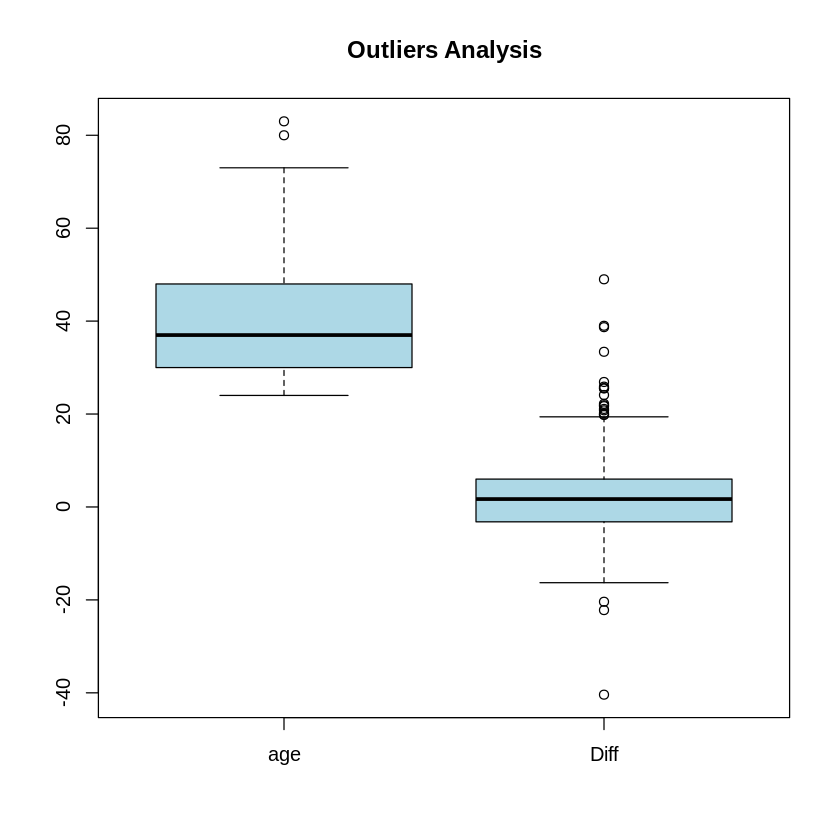

In [ ]:
summary(islander_raw[c("age", "Diff")])
# Create a box plot
boxplot(islander_raw[c("age", "Diff")], main="Outliers Analysis", col="lightblue")

Nhận xét:
- `age`: Có một vài điểm cực ngoại lại ở phía trên
- `Diff`: Tồn tại nhiều điểm cực ngoại lai ở trên và ở phía dưới box


- Tiếp tục vẽ biểu đồ dạng histogram để trực quan các phân bố của dữ liệu

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


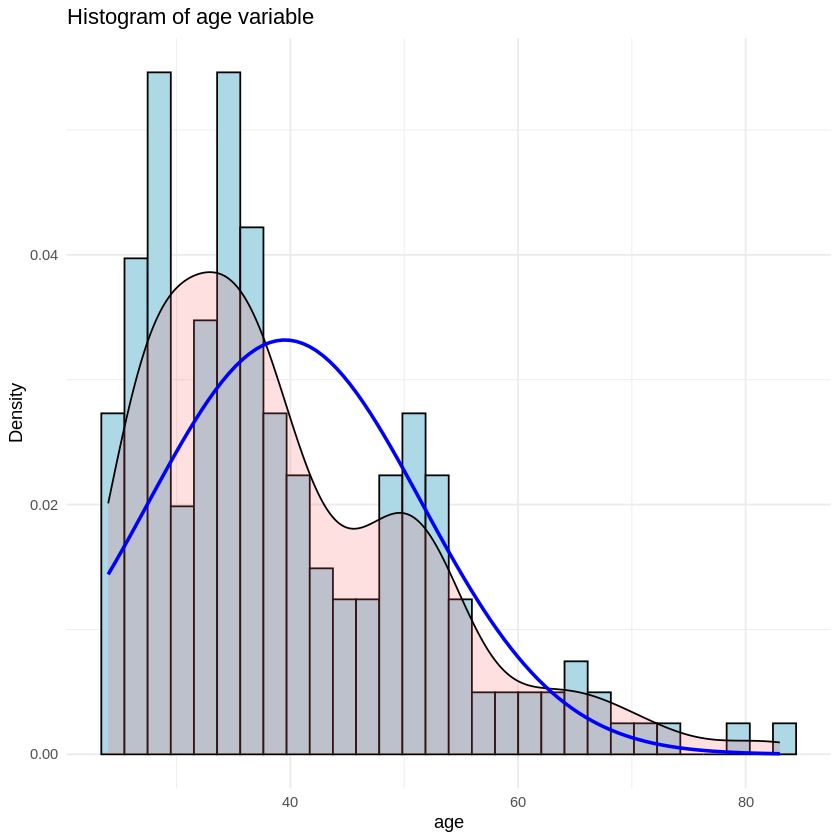

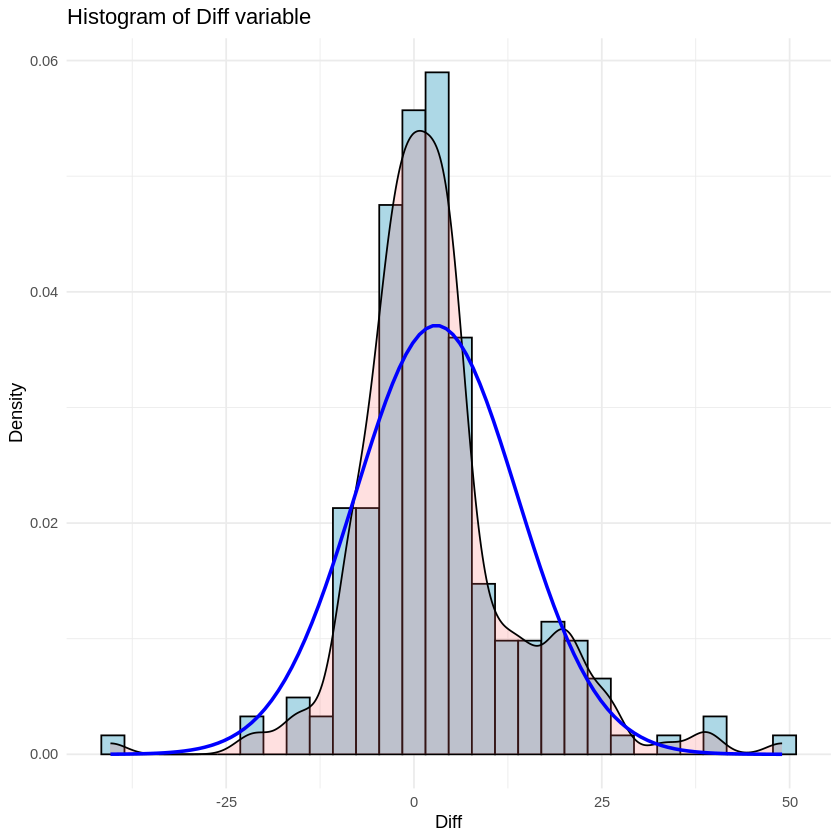

In [ ]:
# Biến Age
ggplot(islander_raw, aes(x = age)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(islander_raw$age, na.rm = TRUE), sd = sd(islander_raw$age, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of age variable", x = "age", y = "Density")

# Biến Diff
ggplot(islander_raw, aes(x = Diff)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(islander_raw$Diff, na.rm = TRUE), sd = sd(islander_raw$Diff, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of Diff variable", x = "Diff", y = "Density")


Nhận xét:
- `Age`: Không có dạng phân bố chuẩn, lệch trái so với giá trị trung bình
- `Diff`: Có dạng phân bố gần chuẩn

### Loại bỏ các biến dư thừa và đưa về dạng phù hợp

In [ ]:
# Loại bỏ các biến: first_name, last_name, Mem_Score_Before và Mem_Score_After
processed_islander = islander_raw[, !(names(islander_raw) %in% c("first_name", "last_name", "Mem_Score_Before", "Mem_Score_After"))]

# Chia tuổi thành 2 nhóm < 50 tuổi và nhóm còn lại
processed_islander$age = processed_islander$age >= 50

processed_islander$age = factor(processed_islander$age)
processed_islander$Dosage = factor(processed_islander$Dosage)
processed_islander$Drug = factor(processed_islander$Drug)
processed_islander$Happy_Sad_group = factor(processed_islander$Happy_Sad_group)
levels(processed_islander$age)
levels(processed_islander$Drug)
levels(processed_islander$Dosage)
levels(processed_islander$Happy_Sad_group)

[1] "FALSE" "TRUE"

[1] "A" "S" "T"

[1] "1" "2" "3"

[1] "H" "S"

- Sau khi factor, chúng ta có các nhóm sau đây:
    - `Age`: CÓ 2 nhóm trên từ 50 tuổi trở lên và nhóm còn lại
    - `Drug`: Có 3 nhóm là A, S, T
    - `Dosage`: có 3 nhóm là 1, 2, 3
    - `Happy_Sad_Group`: có 2 nhóm là H và S
- Tiếp tục xây dựng mô hình ANOVA để xem xét sự phụ thuộc của biến phụ thuộc và biến độc lập

In [ ]:
diff_aov = aov(Diff~., data = processed_islander)
summary(diff_aov)

                 Df Sum Sq Mean Sq F value   Pr(>F)    
age               1      2     2.1   0.024  0.87821    
Happy_Sad_group   1     11    10.6   0.117  0.73233    
Dosage            2   1222   610.8   6.787  0.00142 ** 
Drug              2   4361  2180.6  24.229 4.19e-10 ***
Residuals       191  17190    90.0                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhìn vào bảng kết quả, ta thấy rằng thực tế các biến `Happy_Sad_group` và `age` không tham gia vào quá trình giải thích ý nghĩa của biến phụ thuộc `Diff` (với mức ý nghĩa 5%). Do đó, ta chỉ chọn 2 biến `Drug` và `Dosage` để tiến hành khảo sát. Vậy:
- Mục tiêu: Khảo sát về tác dụng phụ của các loại thuốc chống trầm cảm đối với trí nhớ của người tham gia thử nghiệm, được đánh giá thông qua thời gian hoàn thành một bài kiểm tra trí nhớ
- Biến phản hồi: `Diff` cho biết chênh lệch giữa thời gian (giây) hoàn thành bài kiểm tra trước và sau khi sử dụng thuốc.
- Biến nhân tố:
    - **Drug**: Gồm 3 nhóm `A` (Alprazolam), `S` (Placebo) và `T` (Triazolam)
    - **Dosage**: Gồm 3 nhóm `1` (thấp), `2` (trung bình) và `3` (Cao)


### Visualize dữ liệu

In [ ]:
# Loại biến `age` và `Happy_Sad_group`
processed_islander = processed_islander[, !(names(processed_islander) %in% c("age", "Happy_Sad_group"))]

#### Visualize biến Dosage

Warning message:
“The `fun.y` argument of `stat_summary()` is deprecated as of ggplot2 3.3.0.
ℹ Please use the `fun` argument instead.”


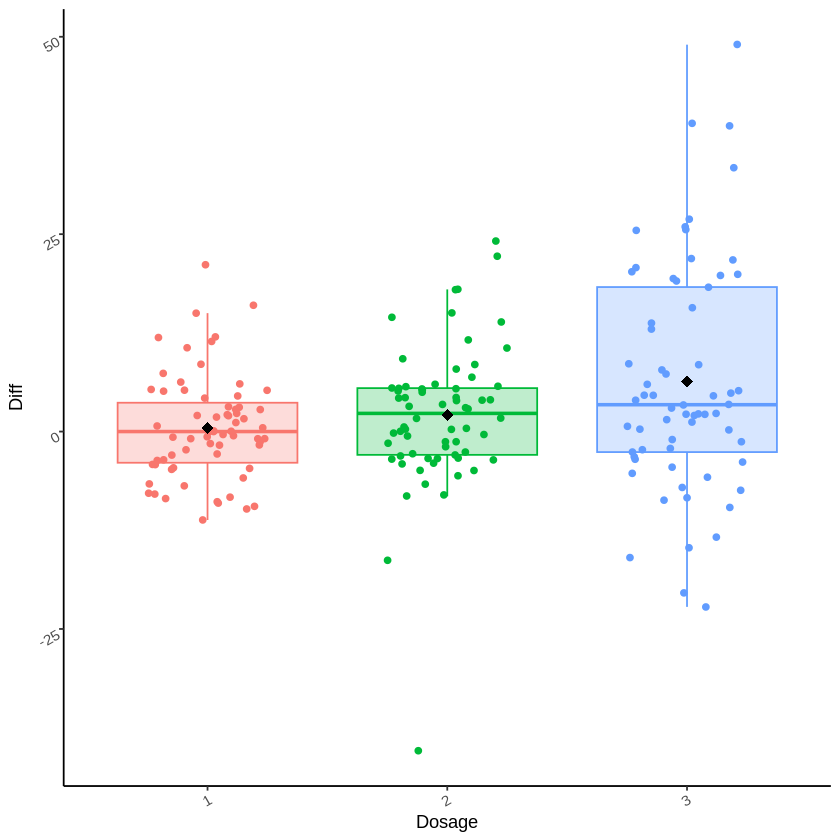

In [ ]:
ggplot(processed_islander ,aes(x=Dosage, y=Diff, colour=Dosage, fill=Dosage))+
  geom_jitter(width=0.25)+
  geom_boxplot(alpha=0.25, outlier.alpha=0) +
  stat_summary(fun.y=mean, colour="black", geom="point",
               shape=18, size=3,show.legend = FALSE) +
  theme_classic() +
  theme(legend.position="none")+
  theme(axis.text = element_text(angle=30, hjust=1, vjust=1))

**Nhận xét:**
- Liều lượng thấp:
    - Trung vị Diff gần bằng 0, với phạm vi nhỏ.
    - Hầu hết các điểm dữ liệu tập trung xung quanh trung vị, với một vài ngoại lệ.
- Liều lượng trung bình:
    - Trung vị Diff vẫn gần bằng 0, nhưng phạm vi dữ liệu lớn hơn một chút so với liều lượng thấp.
    - Có sự phân bố rộng hơn của các điểm, cho thấy sự biến đổi nhiều hơn trong các phản ứng.
- Liều lượng cao:
    - Trung vị Diff cao hơn so với các nhóm khác, gợi ý rằng liều lượng thuốc này có tác dụng lớn hơn.
    - Có sự biến đổi lớn, với một số điểm nằm khá cao hoặc thấp so với trung vị.
    - IQR lớn hơn và sự hiện diện của các ngoại lệ cho thấy một phạm vi rộng của các phản ứng đối với liều lượng cao.

**Kết luận**
- Biểu đồ gợi ý rằng liều lượng cao hơn có thể có tác động đáng kể hơn đến thời gian hoàn thành bài kiểm tra trí nhớ, được chỉ ra bởi trung vị cao hơn và sự biến đổi lớn hơn trong Diff.
- Liều lượng thấp và trung bình cho thấy sự thay đổi nhỏ hơn và ít biến đổi hơn, với nhiều người tham gia có ít hoặc không thay đổi trong thời gian hoàn thành.
- Sự phân bố rộng hơn và trung vị cao hơn trong nhóm liều lượng cao có thể cho thấy rằng mặc dù một số người tham gia có lợi ích đáng kể, những người khác có thể gặp tác dụng phụ, dẫn đến phản ứng không tốt.

#### Visualize biến Drug

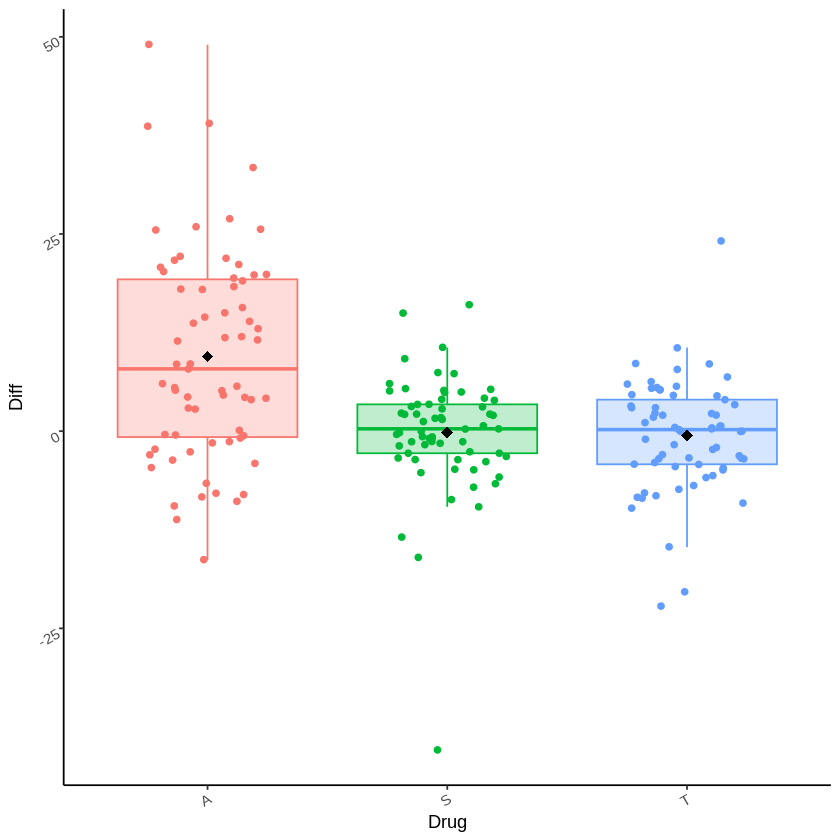

In [ ]:
# Biến Drug
ggplot(processed_islander ,aes(x=Drug, y=Diff, colour=Drug,fill=Drug))+
  geom_jitter(width=0.25)+
  geom_boxplot(alpha=0.25, outlier.alpha=0) +
  stat_summary(fun.y=mean, colour="black", geom="point",
               shape=18, size=3,show.legend = FALSE)+
  theme_classic()+
  theme(legend.position="none")+
  theme(axis.text = element_text(angle=30, hjust=1, vjust=1))

**Nhận xét:**
- Alprazolam (A):
    - Trung vị Diff khá xa với điểm 0 hơn các loại thuốc khác.
    - Có nhiều điểm ngoại lệ, đặc biệt ở phía trên, cho thấy một số người tham gia có sự cải thiện đáng kể về thời gian hoàn thành bài kiểm tra.
    - Trung bình Diff cũng cao hơn, gợi ý rằng Alprazolam có thể có tác dụng tích cực đối với một số người tham gia.

- Triazolam (T):
    - Trung vị Diff gần bằng 0, với phạm vi và sự phân tán nhỏ hơn so với Alprazolam.
    - Trung bình Diff gần với trung vị, cho thấy tác dụng của Triazolam ít biến đổi hơn.
- Placebo (S):
    - Trung vị Diff gần bằng 0, với phạm vi và sự phân tán tương tự như Triazolam.
    - Có một số điểm ngoại lệ, nhưng không nhiều.
    - Trung bình Diff gần với trung vị, cho thấy tác dụng của giả dược (Placebo) ít biến đổi và không có hiệu quả đáng kể.

**Kết luận**
- Alprazolam (A): Có tác dụng đáng kể đối với một số người tham gia, nhưng cũng có nhiều biến đổi, cho thấy có thể có tác dụng phụ hoặc tác động không đồng nhất.
- Triazolam (T) và Placebo (S): Không có sự thay đổi đáng kể trong thời gian hoàn thành bài kiểm tra, gợi ý rằng các loại thuốc này có ít hoặc không có tác dụng cải thiện trí nhớ.

#### Visualize biến phụ thuộc Diff

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-40.400  -3.175   1.700   2.955   5.925  49.000 

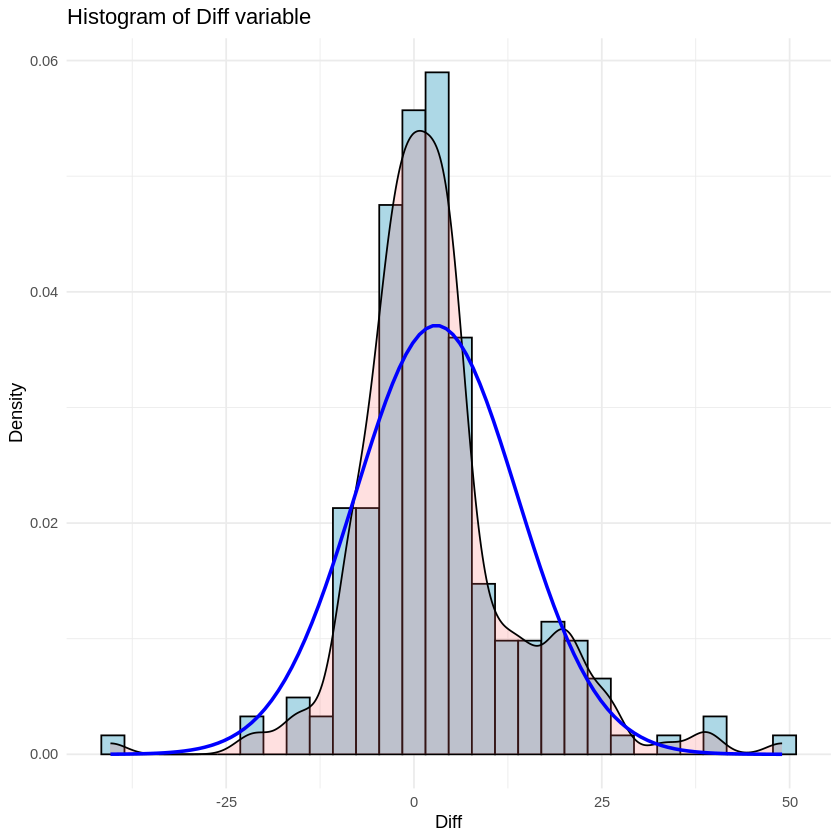

In [ ]:
# Biến phụ thuộc Diff
ggplot(processed_islander, aes(x = Diff)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(processed_islander$Diff, na.rm = TRUE), sd = sd(processed_islander$Diff, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of Diff variable", x = "Diff", y = "Density")
  summary(processed_islander$Diff)

Nhận xét:

- Độ Lệch:

    - Trung bình (Mean) của biến Diff là 2.955, cho thấy thời gian trung bình hoàn thành bài kiểm tra sau khi dùng thuốc tăng thêm khoảng 2.955 giây.
    - Median (Trung vị) là 1.700, thấp hơn giá trị trung bình, cho thấy sự phân phối không hoàn toàn đối xứng.
- Phân Bố Dữ Liệu:

    - Dữ liệu phân bố khá gần với phân phối chuẩn, nhưng có một vài khác biệt:
    - Có một sự tập trung dữ liệu khá cao xung quanh giá trị 0 đến 5, tạo nên một đỉnh phân phối cao hơn so với đường chuẩn.
    - Có sự lan tỏa dữ liệu về cả hai phía của đỉnh, nhưng ít hơn ở phía cực trái (khoảng -40) và cực phải (khoảng 50).

- Khoảng Tứ Phân Vị:

    - 1st Qu. (Quartile đầu tiên): -3.175.
    - 3rd Qu. (Quartile thứ ba): 5.925.
    - Điều này cho thấy phần lớn dữ liệu nằm trong khoảng từ -3.175 đến 5.925, một khoảng phân tán rộng nhưng không đối xứng hoàn toàn quanh trung vị.
- Đỉnh và Đuôi: Biểu đồ cho thấy một đỉnh lớn, khá hẹp, và hai đuôi phân phối khá dài, đặc biệt ở phía phải (hơn 25). Điều này chỉ ra rằng có một số giá trị cực đại cao (tăng lớn trong thời gian hoàn thành bài kiểm tra sau khi dùng thuốc).
- Kết Luận:
    - Sự Phân Tán và Độ Lệch: Biểu đồ cho thấy sự tăng thời gian hoàn thành bài kiểm tra (Diff) sau khi dùng thuốc là phổ biến, với giá trị trung bình dương. Tuy nhiên, phân phối không hoàn toàn đối xứng, với một số giá trị cực đại ở cả hai phía.
    - Khả Năng Phân Phối Chuẩn: Phân phối của biến Diff khá gần với phân phối chuẩn, nhưng có một số khác biệt như đỉnh phân phối cao hơn và đuôi phân phối dài hơn. Điều này có thể là do tác động của một số cá nhân phản ứng mạnh mẽ với thuốc hơn so với phần còn lại.

## Kiểm định các giả thuyết thống kê (ANOVA assumptions)
Gồm các bước sau:
- Các mẫu độc lập (Thỏa mãn bước tiền xử lý)
- Biến phụ thuộc là biến liên tục (Thỏa mãn)
- Các nhóm có phân phối chuẩn hoặc gần chuẩn ==> Sai số có phân phối chuẩn

### Xây dựng và kiểm định mô hình tương tác (Interaction model)

In [ ]:
# Xây dựng mô hình tương tác
int_model = aov(Diff~Dosage * Drug, data = processed_islander)
summary(int_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Dosage        2   1222   610.9   9.536 0.000113 ***
Drug          2   4314  2156.9  33.666 3.12e-13 ***
Dosage:Drug   4   5141  1285.3  20.062 8.74e-14 ***
Residuals   189  12109    64.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét:
- Với mức ý nghĩa 5%, ta thấy rằng giữa `Dosage` và `Drug` có mối quan hệ tương tác với nhau dẫn đến tác động hiệu quả của việc dùng thuốc đối với trí nhớ của người sử dụng.
- Tiếp tục đi kiểm định các thông sô sau:
    - Shapiro-Wilk test
    - leveneTest
    - durbinWatsonTest


	Shapiro-Wilk normality test

data:  av_residual
W = 0.95575, p-value = 7.794e-06


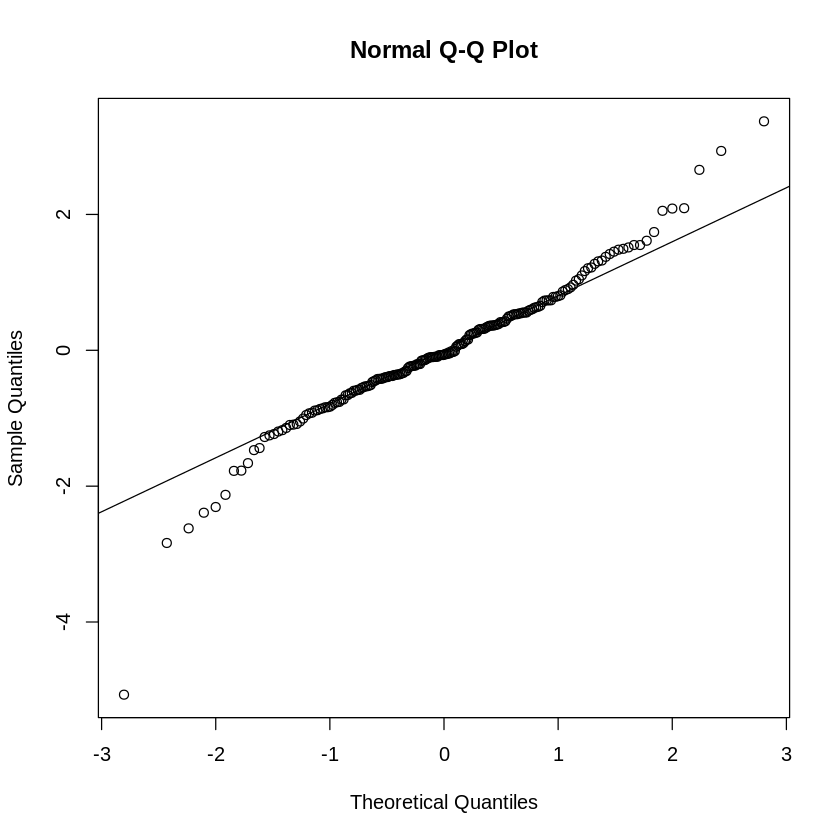

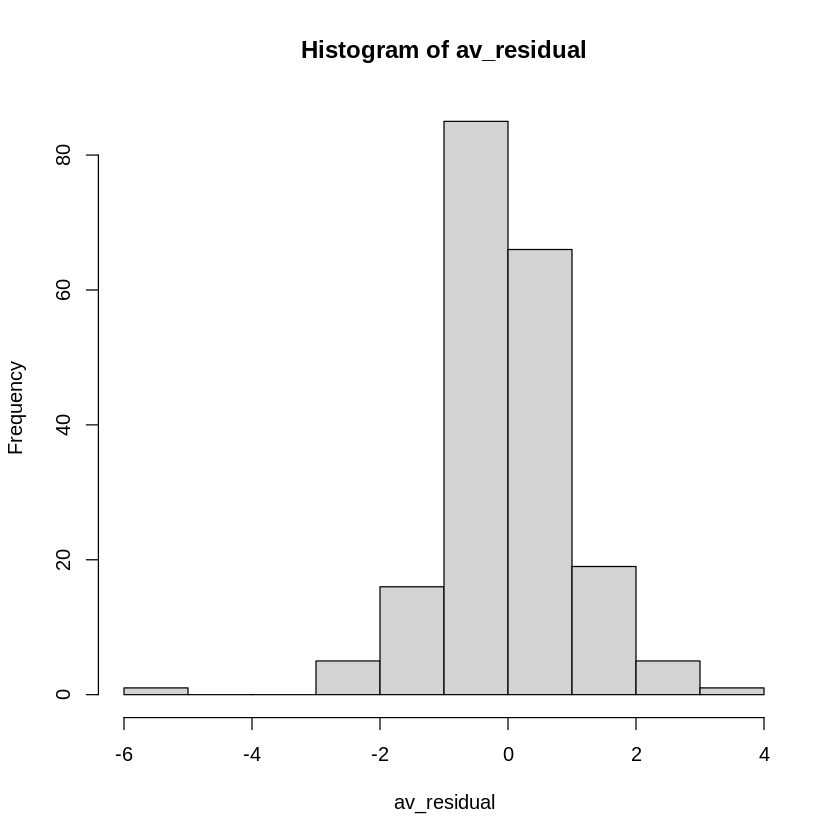

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(int_model)
shapiro.test(av_residual)
# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 7.794e-06 chúng ta đủ cơ sở bác bỏ H0, vậy phần dư có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có một vài điểm bị kéo lệch ra khỏi đường thẳng --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), tuy nhiên, về mặt tổng quan, dữ liệu vẫn có dạng gần chuẩn,

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(int_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,8,0.9961061,0.4404991
,189,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.4404991 > 0.05, ta không đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai đồng nhất.

 lag Autocorrelation D-W Statistic p-value
   1     -0.05315976      2.105716   0.816
 Alternative hypothesis: rho != 0

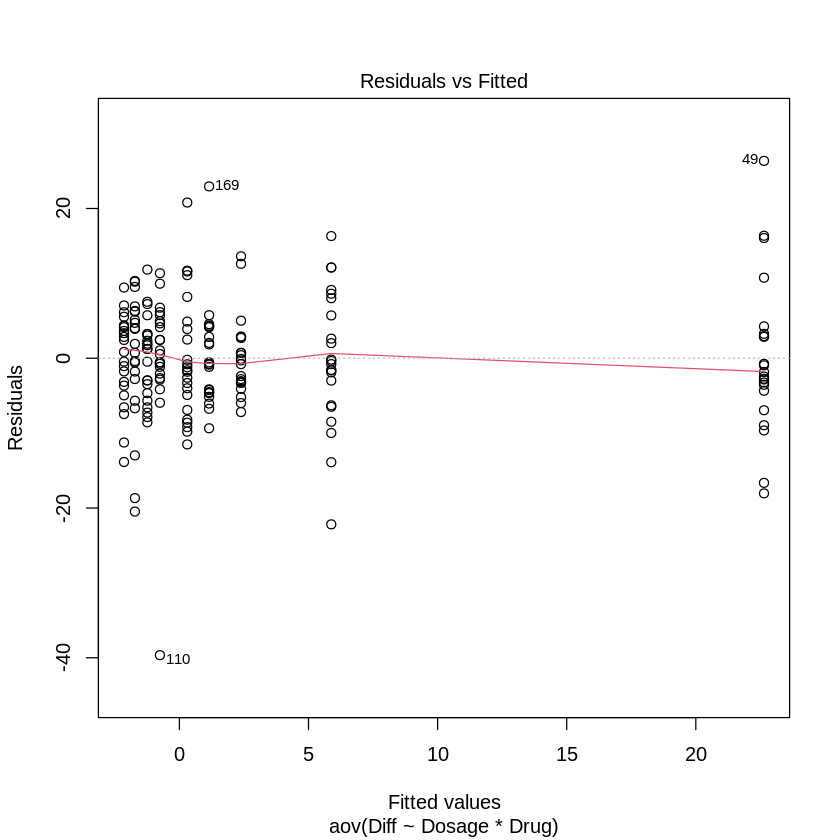

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(int_model)
plot(int_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.816 (> 0.05) nên không có sự tương quan.

### Phân tích phương sai k nhân tố
Gồm các bước sau
- Kiểm tra sự tương tác
- Phân tích ảnh hưởng đơn
    - Phân tích ảnh hưởng đơn của liều lượng ở mỗi loại thuốc
    - Phân tích ảnh hưởng đơn của thuốc ở mỗi liều lượng
- Phân tích ảnh hưởng chính
    - Phân tích ảnh hưởng chính của Dosage với hiệu quả của bài kiểm tra trí nhớ
    - Phân tích ảnh hưởng chính của Drug với hiệu quả của bài kiểm tra trí nhớ

#### Kiểm tra sự tương tác

             Df Sum Sq Mean Sq F value   Pr(>F)    
Dosage        2   1222   610.9   9.536 0.000113 ***
Drug          2   4314  2156.9  33.666 3.12e-13 ***
Dosage:Drug   4   5141  1285.3  20.062 8.74e-14 ***
Residuals   189  12109    64.1                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

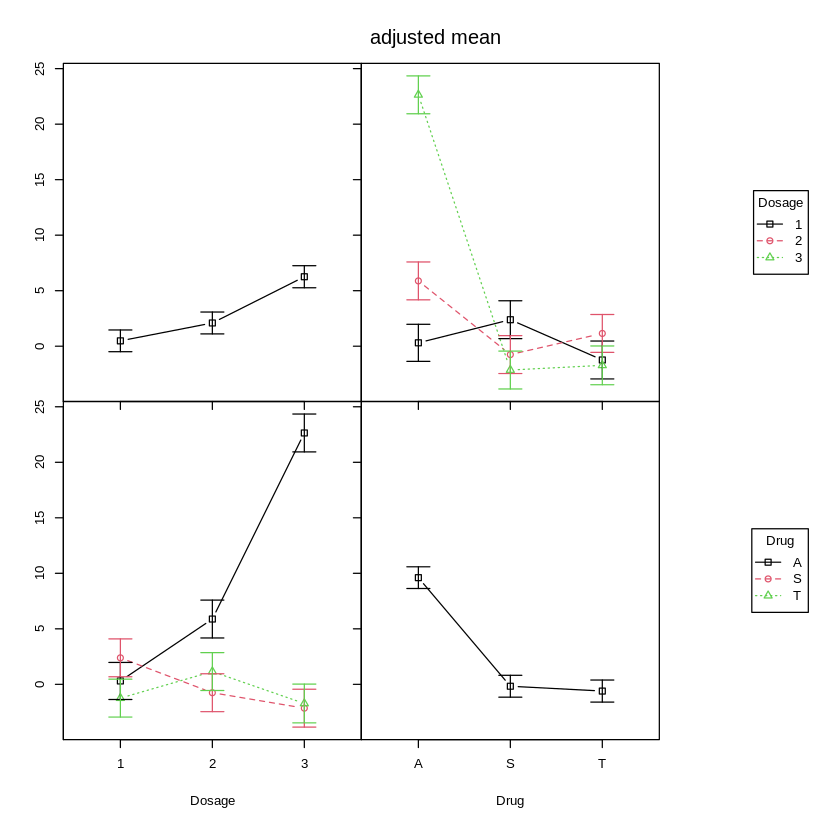

In [ ]:
int_model = aov(Diff~Dosage * Drug, data = processed_islander)
summary(int_model)
plot(interactionMeans(int_model))

Nhận xét:
- Với mức ý nghĩa 5%, ta thấy giữa `Dosage` và `Drug` có sự tương tác với nhau (p-value=8.74e-14). Sự kết hợp giữa hàm lượng thuốc và loại thuốc có ảnh hưởng rất lớn đến thời gian hoàn thành bài kiểm tra, cho thấy rằng không chỉ từng yếu tố riêng lẻ mà sự kết hợp giữa chúng cũng rất quan trọng.

**BIỂU ĐỒ BÊN TRÁI**
--

Biểu đồ bên trái biểu diễn sự tương tác giữa Dosage và Drug dựa trên giá trị trung bình điều chỉnh của Diff.

1. Đồ thị trên cùng bên trái (Dosage theo Drug):

    - Cho thấy sự thay đổi của Diff theo liều lượng (Dosage) cho từng loại thuốc (Drug).
    - Đối với tất cả các loại thuốc, Diff tăng dần khi tăng liều lượng từ 1 đến 3.
2. Đồ thị dưới cùng bên trái (Drug theo Dosage):

- Cho thấy sự thay đổi của Diff theo loại thuốc (Drug) cho từng liều lượng (Dosage).
- Khi liều lượng là 1: sự khác biệt giữa các loại thuốc là tương đối nhỏ. Trong đó loại S cho hiệu quả cao nhất, A và T cho kết quả tệ hơn trước khi sử dụng (mean < 0).
- Khi liều là 2: Có sự thay đổi rõ rệt ở các loại thuốc: Loại S cho kết quả tệ hơn so với trước khi dùng thuốc, loại T có hiệu quả không đáng kể, loại A cho thấy hiệu quả vượt bật.
- Khi liều lượng là 3: Sự khác biệt giữa các loại thuốc trở nên rõ rệt hơn, với Thuốc A cho kết quả tốt nhất so với 3 loại và ở cả 3 liều lượng, trong khi 2 loại còn lại cho kết quả tệ hơn trước khi dùng.

**BIỂU ĐỒ BÊN PHẢI**
--

Biểu đồ bên phải biểu diễn sự tương tác giữa Drug và Dosage dựa trên giá trị trung bình điều chỉnh của Diff.

1. Đồ thị trên cùng bên phải (Drug theo Dosage):

    - Tương tự như đồ thị dưới cùng bên trái của biểu đồ bên trái, nhưng theo chiều ngược lại. Cho thấy sự thay đổi của Diff theo loại thuốc cho từng liều lượng.
    - Đối với thuốc A: Cho kết quả tốt liều lượng cao và trung bình, liều lượng thấp không có sự thay đổi
    - Đối với thuốc T: Không có sự khác biệt giữa các liều lượng và hiệu quả sau và trước khi sửng dụng (Thậm chí giảm (tệ))
    - Đối với thuốc S: Giống T
2. Đồ thị dưới cùng bên phải (Dosage theo Drug):

    - Tương tự như đồ thị trên cùng bên trái của biểu đồ bên trái, nhưng theo chiều ngược lại.
    - Cho thấy sự thay đổi của Diff theo liều lượng cho từng loại thuốc.
    - Cơ bản các thuốc cho kết quả tốt nhất theo thứ tự là là A > S > T.

**NHẬN XÉT**
--
- Cả liều lượng và loại thuốc đều có ảnh hưởng đáng kể đến Diff.
- Có sự tương tác đáng kể giữa liều lượng và loại thuốc, nghĩa là hiệu quả của liều lượng khác nhau phụ thuộc vào loại thuốc được sử dụng.
- Biểu đồ cho thấy rõ ràng rằng Thuốc A (Alprazolam) có ảnh hưởng lớn nhất khi liều lượng tăng, trong khi S có ảnh hưởng ít nhất.

#### Phân tích ảnh hưởng đơn

##### Phân tích ảnh hưởng đơn của liều lượng ở mỗi loại thuốc

In [ ]:
testInteractions(int_model, fixed = "Drug", across = "Dosage")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 8, is not a multiple of vector length 6 of arg 2”


,Dosage1,Dosage2,SE1,SE2,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-22.3365613,-16.759091,2.386970,2.413346,2,6031.8648,47.0749202,7.712930e-17
S,4.5318182,1.390909,2.413346,2.413346,2,237.1403,1.8507313,3.199167e-01
T,0.4829004,2.873810,2.441908,2.441908,2,102.9239,0.8032563,4.493911e-01
Residuals,NA,NA,189.000000,12108.596751,NA,NA,NA,NA


Giả định:
- H0: Liều lượng Không ảnh hưởng đến hiệu quả thuốc
- H1: Liều lượng Có ảnh hưởng đến hiệu quả của thuốc

Nhận xét: Với kết quả phân tích ta có một số nhận xét như sau, với độ tin cậy 5% thì:
- Liều lượng có ảnh hưởng đến kết quả của loại thuốc A
- Liều lượng không ảnh hưởng đến kết quả của lọai thuốc S và T

##### Phân tích ảnh hưởng đơn của thuốc ở mỗi liều lượng

In [ ]:
testInteractions(int_model, fixed = "Dosage", across = "Drug")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 8, is not a multiple of vector length 6 of arg 2”


,Drug1,Drug2,SE1,SE2,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.545257,3.627273,2.386970,2.413346,2,145.8161,1.138003,3.226440e-01
2,4.731818,-1.904545,2.413346,2.413346,2,513.7639,4.009605,3.941034e-02
3,24.364719,-0.421645,2.441908,2.441908,2,8795.3182,68.641940,1.169435e-22
Residuals,NA,NA,189.000000,12108.596751,NA,NA,NA,NA


  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Diff ~ Drug, data = processed_islander)

$Drug
           diff       lwr       upr     p adj
S-A  -9.6413614 -13.62876 -5.653958 0.0000001
T-A -10.0578416 -14.06067 -6.055017 0.0000000
T-S  -0.4164802  -4.43421  3.601249 0.9675045


Giả định:
- H0: Các loại thuốc sẽ không tác động ở mỗi liều lượng
- H1: Các loại thuốc sẽ có tác động ở mỗi liều lượng

Nhận xét: Với kết quả phân tích ta có một số nhận xét như sau, với độ tin cậy 5% thì:
- Hầu hết các loại thuốc sẽ có tác động ở liều lượng cao
- Liều lượng trung bình cũng sẽ có tác động nhưng không đáng kể (có ý nghĩa ở mức 0.4%)
- Liều lượng thấp cho kết quả không đáng kể.


##### Phân tích ảnh hưởng đơn giữa các nhóm thuốc ứng với mỗi liều lượng

In [ ]:
options(contrasts = c(unordered="contr.sum", ordered="contr.poly"))
A_vs_S = list(Drug = c(1, -1, 0))
A_vs_T = list(Drug = c(1, 0, -1))
S_vs_T = list(Drug = c(0, 1, -1))

In [ ]:
# Nhóm A và S
testInteractions(int_model, custom = c(A_vs_S), fixed = "Dosage", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Drug1,-2.082016,2.386970,1.0,48.7423,0.7608062,1.000000e+00
2 : Drug1,6.636364,2.413346,1.0,484.4545,7.5617275,1.962325e-02
3 : Drug1,24.786364,2.413346,1.0,6758.0020,105.4839312,1.813548e-19
Residuals,NA,189.000000,12108.6,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa nhóm thuốc A và S ở các liều lượng
- H1: Có sự khác nhau giữa nhóm thuốc A và S ở các liều lượng

Nhận xét: Với độ tin cậy 5%
- Có sự khác biệt về hiệu quả khi sử dụng thuốc thuốc A và S ở các  liều lượng cao và trung bình
- Ở liều lượng thấp: Không có sự khác biệt

In [ ]:
# Nhóm A và T
testInteractions(int_model, custom = c(A_vs_T), fixed = "Dosage", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Drug1,1.545257,2.386970,1.0,26.8497,0.4190901,1.000000e+00
2 : Drug1,4.731818,2.413346,1.0,246.2911,3.8442956,1.541547e-01
3 : Drug1,24.364719,2.441908,1.0,6378.1734,99.5552823,1.262176e-18
Residuals,NA,189.000000,12108.6,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa nhóm thuốc A và T ở các liều lượng
- H1: Có sự khác nhau giữa nhóm thuốc A và T ở các liều lượng

Nhận xét: Với độ tin cậy 5%
- Ở liều cao: Có sự khác biệt về hiệu quả khi sử dụng thuốc ở các  loại thuốc A và T
- Ở liều thấp và trung bình: Không có sựu ảnh hưởng rõ rệt

In [ ]:
# Nhóm S và T
testInteractions(int_model, custom = c(S_vs_T), fixed = "Dosage", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Drug1,3.627273,2.413346,1.0,144.72818,2.25902530,0.4035201
2 : Drug1,-1.904545,2.413346,1.0,39.90023,0.62279248,1.0000000
3 : Drug1,-0.421645,2.441908,1.0,1.91015,0.02981504,1.0000000
Residuals,NA,189.000000,12108.6,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa loại thuốc S và T
- H1: Có sự khác nhau giữa loại thuốc S và T

Nhận xét: Với độ tin cậy 5% thì không có sự khác biệt nào ở cả 3 liều lượng.

**Nhận xét chung**
 Khi dùng thuốc liều cao, giữa các nhóm sẽ cho ra các phản ứng ảnh hưởng đến trí nhớ ở nhóm A-T và A-S. Tuy nhiên, nhóm S-T lại không cho thấy sự tương tác nào có ý nghĩa thống kê.

##### Phân tích ảnh hưởng đơn giữa các nhóm liều lượng ứng với mỗi loại thuốc

In [ ]:
options(contrasts = c(unordered="contr.sum", ordered="contr.poly"))
low_vs_medium = list(Dosage = c(1, -1, 0))
low_vs_high = list(Dosage = c(1, 0, -1))
medium_vs_high = list(Dosage = c(0, 1, -1))

In [ ]:
# Nhóm thấp và trung bình
testInteractions(int_model, custom = c(low_vs_medium), fixed = "Drug", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A : Dosage1,-5.577470,2.386970,1.0,349.79415,5.4598477,0.06151837
S : Dosage1,3.140909,2.413346,1.0,108.51841,1.6938362,0.58404073
T : Dosage1,-2.390909,2.413346,1.0,62.88091,0.9814921,0.96929207
Residuals,NA,189.000000,12108.6,NA,NA,NA


Giả định:
- H0: Không có sự tương tác nhau giữa liều thấp và liều trung bình
- H1: Có sự tương tác nhau giữa liều thấp và liều trung bình

Nhận xét: Với độ tin cậy 5%
- Ở loại thuốc A: Có sự tương tác về hiệu quả khi sử dụng thuốc ở các  liều lượng thấp và liều lượng trung bình
- Ở loại thuốc S và T: Không có sự tương tác

In [ ]:
# Nhóm thấp và cao
testInteractions(int_model, custom = c(medium_vs_high), fixed = "Drug", adjustment = "none")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A : Dosage1,-16.759091,2.413346,1.0,3089.53841,48.2238175,5.939718e-11
S : Dosage1,1.390909,2.413346,1.0,21.28091,0.3321683,5.650708e-01
T : Dosage1,2.873810,2.441908,1.0,88.73388,1.3850245,2.407272e-01
Residuals,NA,189.000000,12108.6,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa liều thấp và liều cao
- H1: Có sự khác nhau giữa liều thấp và liều cao

Nhận xét: Với độ tin cậy 5%
- Ở loại thuốc A: Có sự tương tác khi sử dụng thuốc ở các liều lượng thấp và liều lượng cao
- Ở loại thuốc S và T: Ở loại thuốc S và T: Không có sự tương tác mang ý nghĩ thống kê

In [ ]:
# Nhóm trung bình và cao
testInteractions(int_model, custom = c(medium_vs_high), fixed = "Drug", adjustment = "none")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A : Dosage1,-16.759091,2.413346,1.0,3089.53841,48.2238175,5.939718e-11
S : Dosage1,1.390909,2.413346,1.0,21.28091,0.3321683,5.650708e-01
T : Dosage1,2.873810,2.441908,1.0,88.73388,1.3850245,2.407272e-01
Residuals,NA,189.000000,12108.6,NA,NA,NA


Giả định:
- H0: Không có sự tương tác giữa liều trung bình và liều cao
- H1: Có sự tương tác giữa liều trung bình và liều cao

Nhận xét: Với độ tin cậy 5%
- Ở loại thuốc A: Có sự tương tác khi sử dụng thuốc ở các  liều lượng trung bình và liều lượng cao
- Ở loại thuốc S và T: Không có sự tương tác mang ý nghĩa thống kê

**Nhận xét chung**
- Hầu hết các liều lượng thấp và trung bình sẽ cho thấy mức độ ít tương tác mang ý nghĩ thống kê ở các loại thuốc
- Hầu hết các loại thuốc T và S cho kết quả là không có sự tương tác giữa liều lượng với loại A

#### Phân tích ảnh hưởng chính

##### Phân tích ảnh hưởng chính của Dosage với hiệu quả của bài kiểm tra trí nhớ
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
dosage_model = aov(Diff~Dosage, data = processed_islander)
summary(dosage_model)

             Df Sum Sq Mean Sq F value  Pr(>F)   
Dosage        2   1222   610.9   5.524 0.00464 **
Residuals   195  21563   110.6                   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Dosage có ý nghĩa trong việc giải thích mô hình


	Shapiro-Wilk normality test

data:  av_residual
W = 0.94813, p-value = 1.397e-06


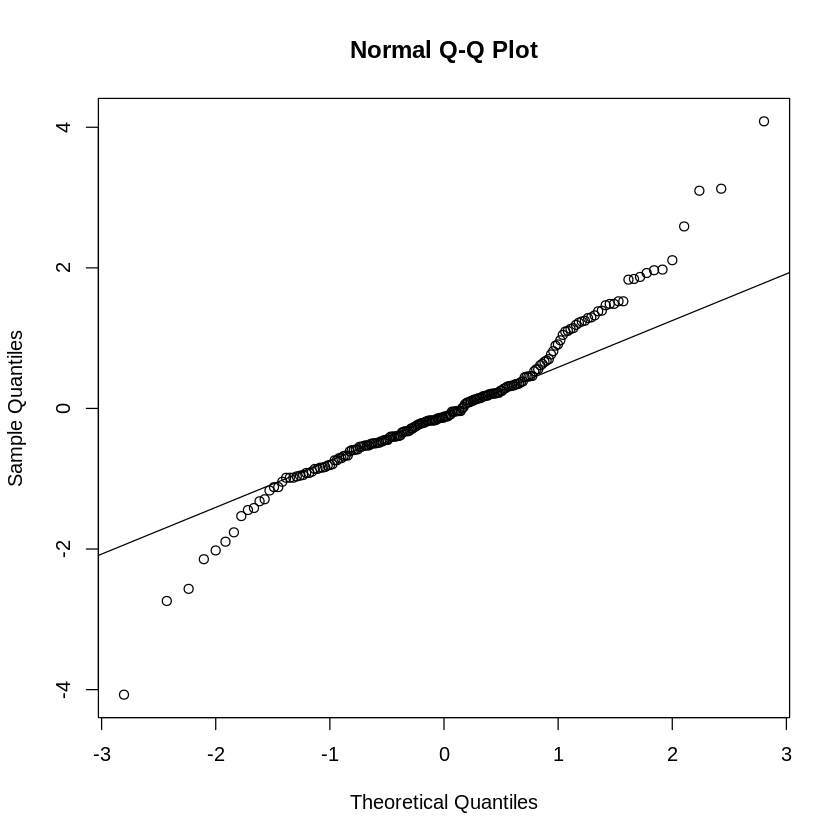

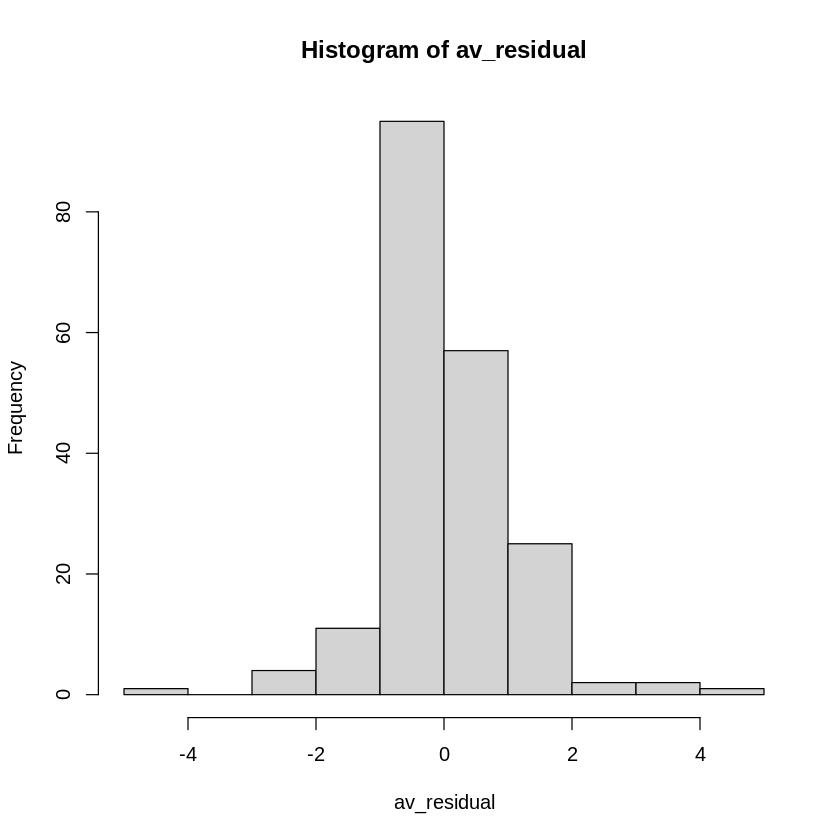

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(dosage_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Phần dư Tuân theo phân phối chuẩn
- H1: Phần dư Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 1.397e-06 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có một vài điểm bị kéo lệch ra khỏi đường thẳng --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), tuy nhiên, về mặt tổng quan, dữ liệu vẫn có dạng gần chuẩn

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(dosage_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,11.76277,1.502826e-05
,195,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 1.502826e-05 < 0.05, ta đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai không đồng nhất.

 lag Autocorrelation D-W Statistic p-value
   1       0.3993242      1.198467       0
 Alternative hypothesis: rho != 0

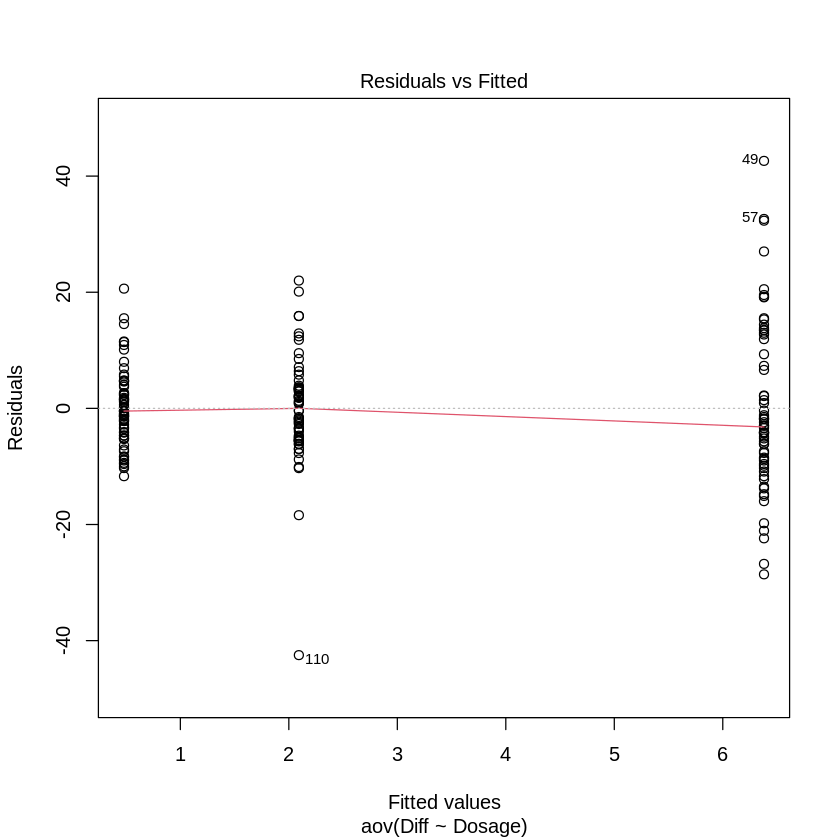

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(dosage_model)
plot(dosage_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0 nên có sự tương quan dương.

Kiểm định trung bình giữa các nhóm liều lượng


	Pairwise comparisons using t tests with pooled SD 

data:  Diff and Dosage 

  1      2     
2 1.0000 -     
3 0.0045 0.0620

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Diff ~ Dosage, data = processed_islander)

$Dosage
        diff         lwr       upr     p adj
2-1 1.611827 -2.69534819  5.919003 0.6511582
3-1 5.899403  1.57556917 10.223237 0.0042357
3-2 4.287576 -0.05235809  8.627510 0.0536311


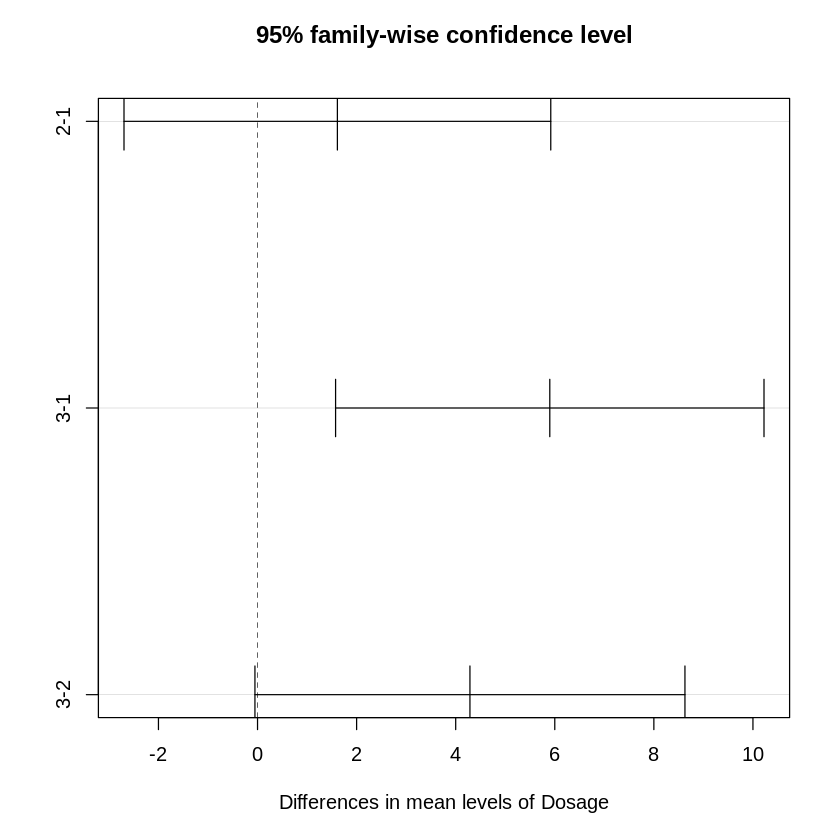

In [ ]:
# Kiểm định trung bình giữa các nhóm liều lượng
with(processed_islander, pairwise.t.test(Diff, Dosage, p.adj = "bonferroni"))
TukeyHSD(aov(Diff~Dosage, data=processed_islander), conf.level = 0.95)
plot(TukeyHSD(aov(Diff~Dosage, data=processed_islander), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có: Cặp 3-1 có p-value đều có giá trị nhỏ hơn 0.05 (độ tin cậy 95%) nên ta cơ sở để bác bỏ H0. Vậy rõ ràng giữa các nhóm này có giá trị trung bình là khác nhau. Nghĩa là các nhóm thuốc liều cao và thấp thì cho thấy mức độ ảnh hưởng đến bệnh nhân khác nhau. Còn các nhóm còn lại thì không, Để rõ hơn, ta tiến hành kiểm định Tukey's.
- Nhìn vào kết quả và hình vẽ ta cũng thấy ngay giữa nhóm 3-1có mức độ hiệu quả trung bình khác nhau, 3-2 và 1-2 có mức độ hiệu quả trung bình như nhau (đồ thị cắt điểm 0)

Phân tích tương tác của từng nhóm liều lượng với nhau

In [ ]:
A_vs_S = list(Dosage = c(1, -1, 0))
A_vs_T = list(Dosage = c(1, 0, -1))
S_vs_T = list(Dosage = c(0, 1, -1))
testInteractions(dosage_model, custom = A_vs_S, adjustment = 'bonferroni')
print("----------------------------------------------------------")
testInteractions(dosage_model, custom = A_vs_T, adjustment = 'bonferroni')
print("----------------------------------------------------------")
testInteractions(dosage_model, custom = S_vs_T, adjustment = 'bonferroni')

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dosage1,-1.611827,1.823722,1.00,86.37818,0.7811232,0.3778862
Residuals,NA,195.000000,21563.49,NA,NA,NA


[1] "----------------------------------------------------------"


Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dosage1,-5.899403,1.830776,1.00,1148.234,10.38355,0.001490166
Residuals,NA,195.000000,21563.49,NA,NA,NA


[1] "----------------------------------------------------------"


Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dosage1,-4.287576,1.837593,1.00,602.0182,5.444087,0.02065394
Residuals,NA,195.000000,21563.49,NA,NA,NA


Giả định:
- H0: Không có sự tương tác giữa 2 nhóm thuốc được nhắc đến
- H1: Có sự tương tác giữa 2 nhóm thuốc được nhắc đến

Với p-value=0.05, ta có kết luận như sau:
- Nhóm A và S không có sự tương tác với nhau
- Nhóm A và T có sự tương tác với nhau
- Nhóm T và S có sự tương tác với nhau

##### Phân tích ảnh hưởng chính của Drug với hiệu quả của bài kiểm tra trí nhớ
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
drug_model = aov(Diff~Drug, data = processed_islander)
summary(drug_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Drug          2   4305  2152.4   22.71 1.36e-09 ***
Residuals   195  18481    94.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Dosage có ý nghĩa trong việc giải thích mô hình


	Shapiro-Wilk normality test

data:  av_residual
W = 0.96098, p-value = 2.777e-05


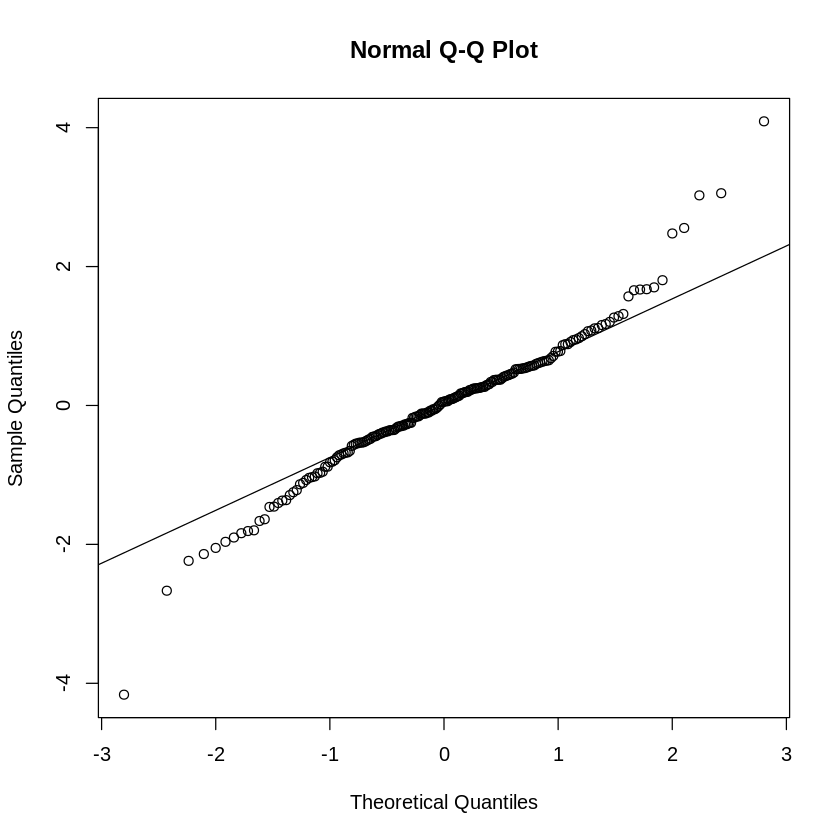

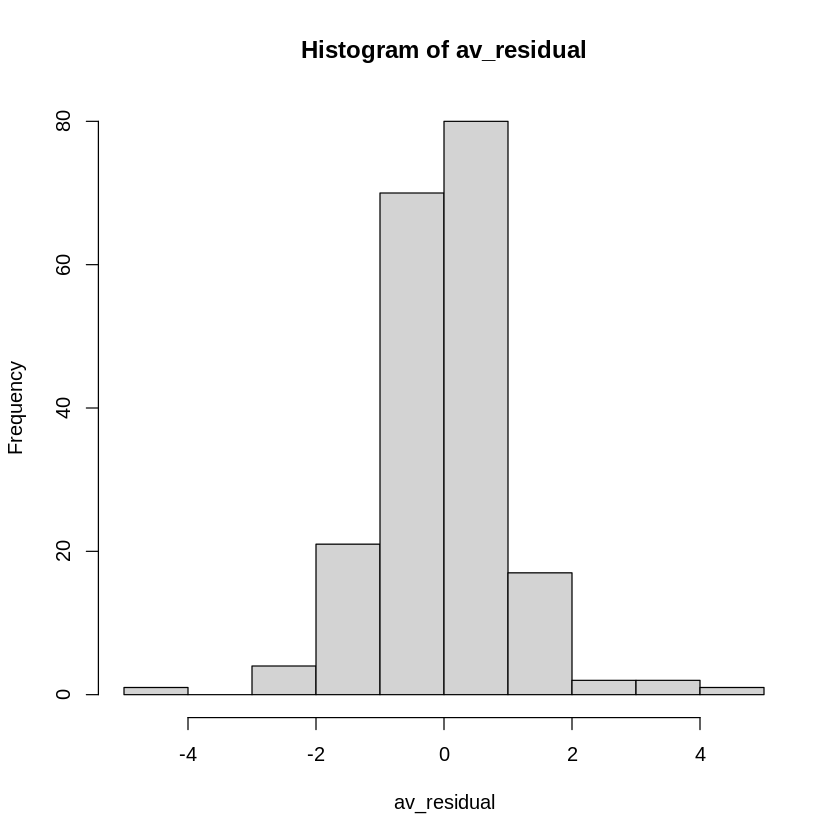

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(drug_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 2.777e-05 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có một vài điểm bị kéo lệch ra khỏi đường thẳng --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), tuy nhiên, về mặt tổng quan, dữ liệu vẫn có dạng gần chuẩn

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(drug_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,19.06641,2.735522e-08
,195,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 2.735522e-08 < 0.05, ta  đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai không đồng nhất.

 lag Autocorrelation D-W Statistic p-value
   1       0.2969101      1.398674       0
 Alternative hypothesis: rho != 0

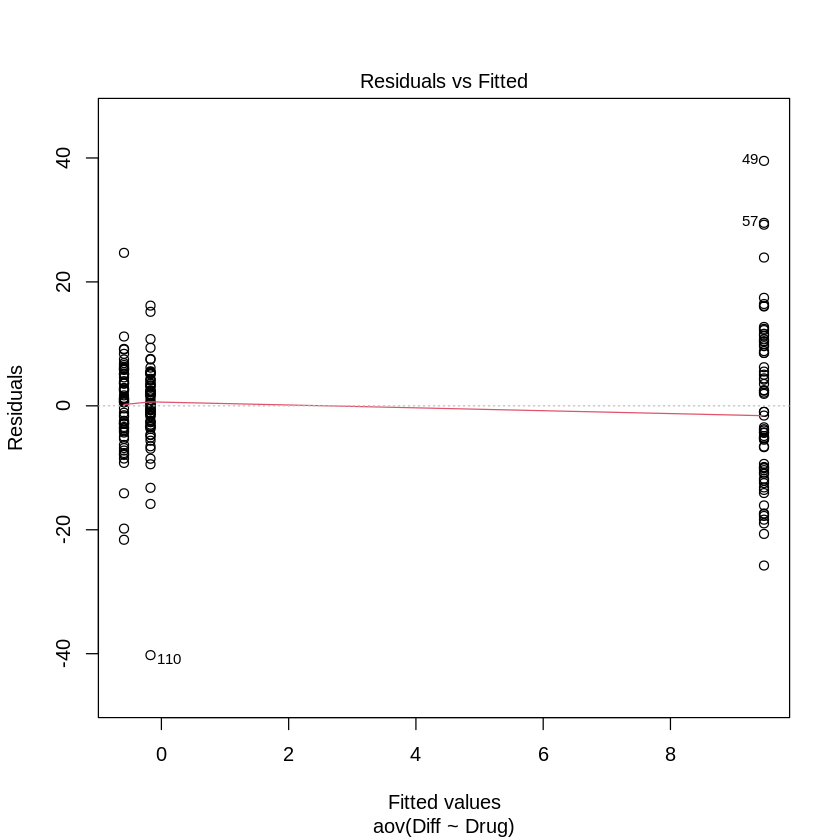

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(drug_model)
plot(drug_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0 nên có sự tương quan dương.

Kiểm định độ hiệu quả trung bình giữa các nhóm thuốc


	Pairwise comparisons using t tests with pooled SD 

data:  Diff and Drug 

  A       S
S 1.2e-07 -
T 4.0e-08 1

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Diff ~ Drug, data = processed_islander)

$Drug
           diff       lwr       upr     p adj
S-A  -9.6413614 -13.62876 -5.653958 0.0000001
T-A -10.0578416 -14.06067 -6.055017 0.0000000
T-S  -0.4164802  -4.43421  3.601249 0.9675045


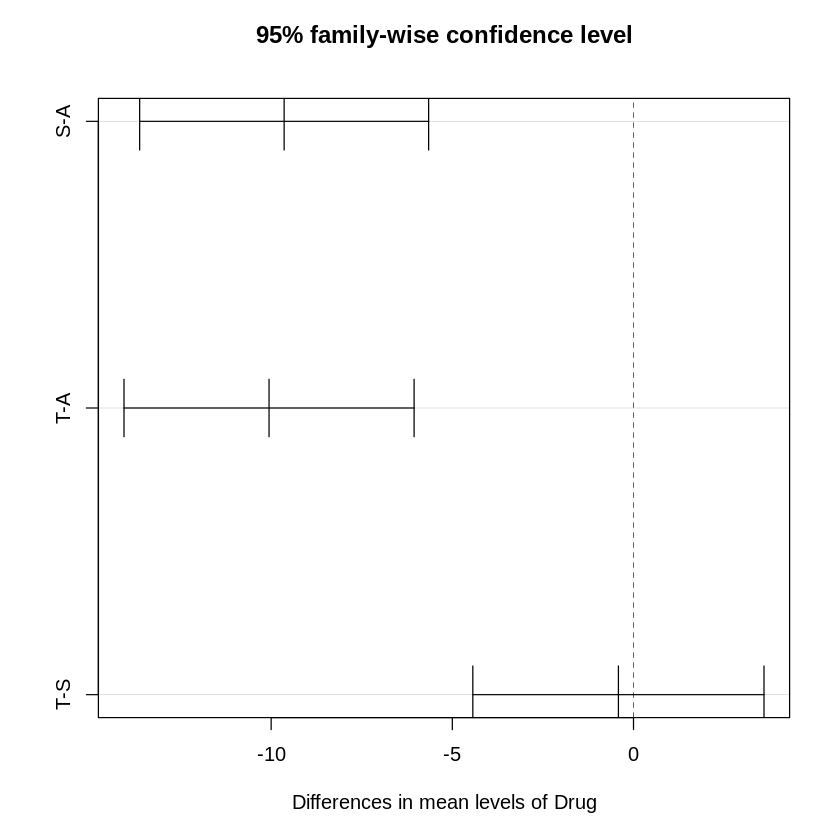

In [ ]:
# Kiểm định độ hiệu quả trung bình giữa các nhóm thuốc
with(processed_islander, pairwise.t.test(Diff, Drug, p.adj = "bonferroni"))
TukeyHSD(aov(Diff~Drug, data=processed_islander), conf.level = 0.95)
plot(TukeyHSD(aov(Diff~Drug, data=processed_islander), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có:
    + Nhóm T-S có p-value > 0.05 nên không đủ bác bỏ H0, vậy nhóm này có giá trị trung bình bằng nhau.
    + Các nhóm còn lại p-value đều có giá trị nhỏ hơn 0.05 (độ tin cậy 95%) nên ta có cơ sở để bác bỏ H0. Vậy rõ ràng giữa các nhóm này có giá trị trung bình là khác nhau. Nghĩa là các nhóm thuốc khác nhau thì cho thấy mức độ ảnh hưởng đến bệnh nhân khác nhau. Để rõ hơn, ta tiến hành kiểm định Tukey's
- Nhìn vào kết quả và hình vẽ ta cũng thấy ngay giữa nhóm S-A và T-A có mức độ hiệu quả trung bình khác nhau, T-S có mức độ hiệu quả trung bình như nhau (đồ thị cắt điểm 0)

### Xây dựng và kiểm định mô hình cộng (Additive model)
Gồm các bước sau:
- Xây dựng mô hình với các biến
- Kiểm định mô hình

In [ ]:
add_model = lm(Diff~., data=processed_islander)
add_model = MASS::stepAIC(add_model, k = log(nrow(processed_islander)), trace = 0)
summary(add_model)
add_model$coefficients
contrasts(processed_islander$Dosage)


Call:
lm(formula = Diff ~ Dosage + Drug, data = processed_islander)

Residuals:
    Min      1Q  Median      3Q     Max 
-39.387  -4.702   0.161   5.341  36.099 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9338     0.6720   4.366 2.06e-05 ***
Dosage1      -2.5514     0.9467  -2.695  0.00766 ** 
Dosage2      -0.8414     0.9502  -0.885  0.37700    
Drug1         6.5744     0.9467   6.945 5.64e-11 ***
Drug2        -3.1051     0.9502  -3.268  0.00128 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9.454 on 193 degrees of freedom
Multiple R-squared:  0.2429,	Adjusted R-squared:  0.2273 
F-statistic: 15.48 on 4 and 193 DF,  p-value: 5.296e-11


(Intercept)     Dosage1     Dosage2       Drug1       Drug2 
  2.9338405  -2.5513687  -0.8414163   6.5743888  -3.1050527

1,1,0
2,0,1
3,-1,-1


Nhận xét: Với p-value=5%, các biến Dosage và Drug đều có ý nghĩa trong giải thích mô hình. Ta tiến hành kiểm định  Shapiro và Breusch-Pagan


	Shapiro-Wilk normality test

data:  av_residual
W = 0.96409, p-value = 6.156e-05


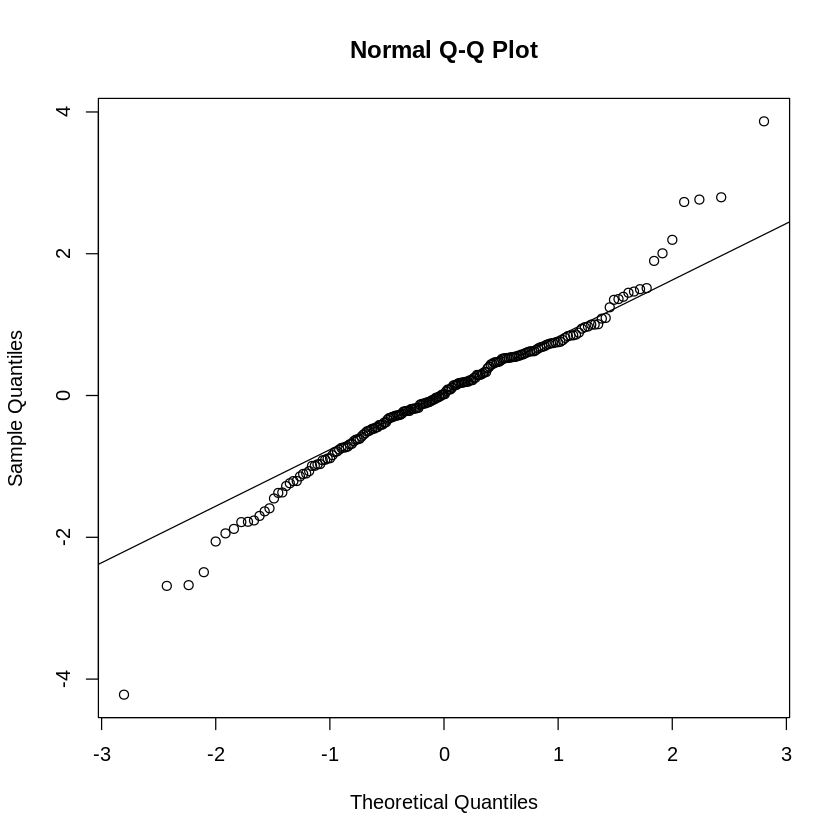

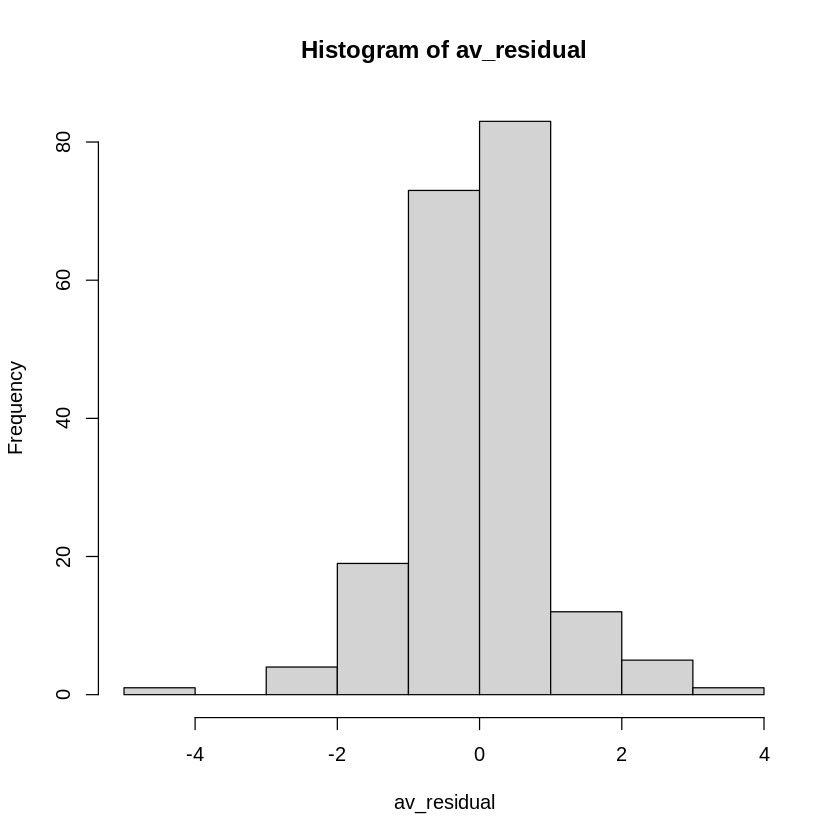

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(add_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 6.156e-05 chúng ta đủ cơ sở bác bỏ H0, vậy sai số có phân phối không chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có một vài điểm bị kéo lệch ra khỏi đường thẳng --> Khả năng các điểm nhiễu chính là các điểm ngoại lệ (outliners), tuy nhiên, về mặt tổng quan, dữ liệu vẫn có dạng gần chuẩn

 lag Autocorrelation D-W Statistic p-value
   1       0.2550773      1.484015   0.002
 Alternative hypothesis: rho != 0

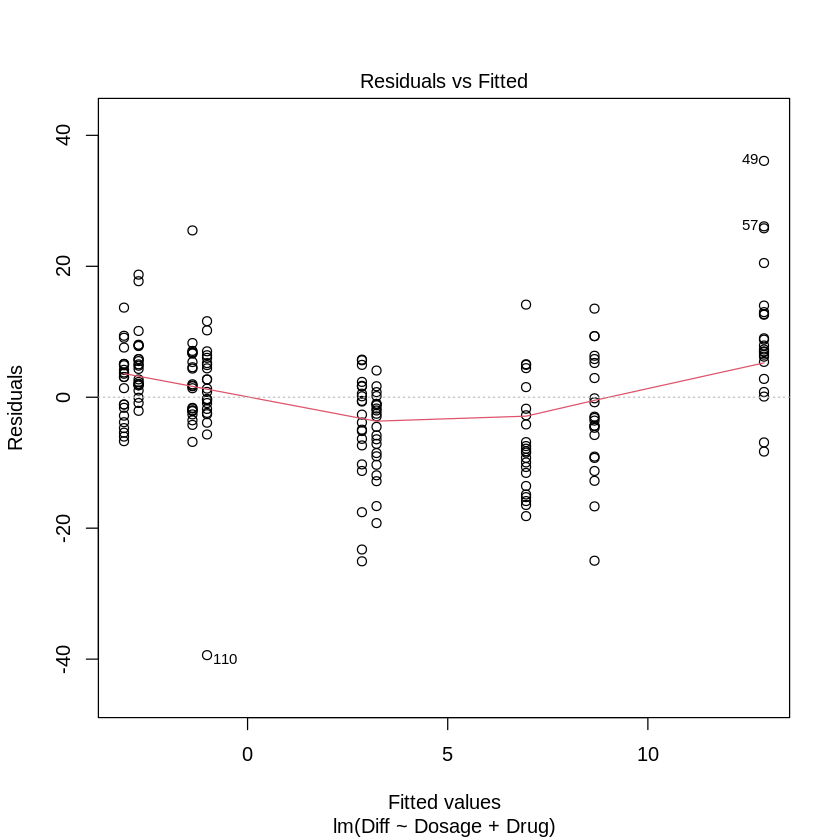

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(add_model)
plot(add_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0 nên có sự tương quan dương.

In [ ]:
# Kiểm định  Breusch-Pagan
bptest(add_model)


	studentized Breusch-Pagan test

data:  add_model
BP = 9.0739, df = 4, p-value = 0.05928


Giả định:
 - H0: phương sai không đổi
 - H1: phương sai thay đổi

 Với p-value=0.059 > 0.05 thì ta không đủ điều kiện bác bỏ H0. Vậy phương sai của mô hình không thay đổi.

Như vậy, mô hình cộng được xây dựng như sau:
Diff=2.9338−2.5514×Dosage
1
​
 −0.8414×Dosage
2
​
 +6.5744×Drug
1
​
 −3.1051×Drug
2
​

Với Adjusted R-squared = 0.2273, các biến giải thích được 22,73\% ý nghĩa của mô hình, điều này có nghĩa rằng việc phục hồi trí nhớ sẽ bị chi phối bởi rất nhiều yếu tố (phần lớn là bản thân của ngươi bệnh trầm cảm), chứ không chỉ mỗi tác động của thuốc. Sau đây sẽ là một số nhận xét của mô hình này:
- Hiệu ứng của liều lượng thứ nhất so với mức cơ bản. Giảm thời gian hoàn thành bài kiểm tra trí nhớ xuống 2.5514 giây, có ý nghĩa thống kê (p < 0.01).
- item Dosage2: Hiệu ứng của liều lượng thứ hai so với mức cơ bản. Giảm thời gian hoàn thành bài kiểm tra trí nhớ xuống 0.8414 giây, nhưng không có ý nghĩa thống kê (p = 0.377).

- Drug1: Hiệu ứng của loại thuốc thứ nhất so với mức cơ bản. Tăng thời gian hoàn thành bài kiểm tra trí nhớ lên 6.5744 giây, có ý nghĩa thống kê cao (p < 0.001).
- Drug2: Hiệu ứng của loại thuốc thứ hai so với mức cơ bản. Giảm thời gian hoàn thành bài kiểm tra trí nhớ xuống 3.1051 giây, có ý nghĩa thống kê (p < 0.01).
- F-statistic: 15.48 với p-value = 5.296e-11, cho thấy mô hình tổng thể có ý nghĩa thống kê.

Kết luận: Nếu xem bản thân loại thuốc và liều thuốc tương tác một cách độc lập, thì sau đây là khuyến nghị cho bác sỹ:
- Liều lượng: Liều lượng thứ nhất có ảnh hưởng đáng kể đến thời gian hoàn thành bài kiểm tra trí nhớ, trong khi liều lượng thứ hai không có ảnh hưởng đáng kể. Khuyến nghị bác sỹ dùng liều lượng thứ nhất (liều lượng thấp).
- Loại thuốc: Cả hai loại thuốc đều có ảnh hưởng đáng kể đến thời gian hoàn thành bài kiểm tra trí nhớ, với loại thuốc thứ nhất tăng thời gian và loại thuốc thứ hai giảm thời gian. Khuyến nghị bác sỹ sử cho bệnh nhân sử dụng loại thuốc thứ hai (loại thuốc S)
- Thực tế thì 2 nhân tố này ảnh hưởng trực tiếp đến nhau và cho kết quả khác với mô hình cộng (phân tích ảnh hưởng đơn ở phần trước) vì vậy, cần phải cẩn thận cân nhắc khi sử dụng thuốc tránh đem lại hậu quả không mong muốn ngoài tầm kiểm soát.

## Cải tiến mô hình

Như chúng ta đã biết, trong quá trình xử lý dữ liệu, ta thấy có một các điểm cực ngoại lai, khả năng cao sẽ ảnh hưởng đến chất lượng mô hình. Vì vậy chúng ta sẽ tiến hành loại bỏ các điểm này

In [ ]:
# Khảo sát ngoại lai theo biến diff
diff_data = processed_islander["Diff"]
outliers_index = list()
extreme_outliers_index = list()

for (i in 1:ncol(diff_data)) {
  # Tính toán Q1, Q3 và IQR
  Q1 = quantile(diff_data[, i], 0.25, na.rm = TRUE)
  Q3 = quantile(diff_data[, i], 0.75, na.rm = TRUE)
  IQR = Q3 - Q1

  # Xác định ngoại lai
  outliers_index_i = diff_data[, i] < (Q1 - 1.5 * IQR) | diff_data[, i] > (Q3 + 1.5 * IQR)
  # outliers_i = diff_data[diff_data[, i] < (Q1 - 1.5 * IQR) | diff_data[, i] > (Q3 + 1.5 * IQR), i]

  # Lưu trữ ngoại lai
  field_name = names(diff_data)[i]
  outliers_index[[field_name]] = which(outliers_index_i)

  # Xác định cực ngoại lai
  extreme_outliers_index_i = diff_data[, i] < (Q1 - 3 * IQR) | diff_data[, i] > (Q3 + 3 * IQR)
  extreme_outliers_index[[field_name]] = which(extreme_outliers_index_i)
}
# In kết quả theo từng biến ra màn hình
for (i in 1:ncol(diff_data)) {
  print(paste("Biến:", names(diff_data)[i]))
  print(paste("Số ngoại lai:", length(outliers_index[[names(diff_data)[i]]])))
  print(paste("Số cực ngoại lai:", length(extreme_outliers_index[[names(diff_data)[i]]])))
}

# Tìm tổng số quan trắc ngoại lai và cực ngoại lai thực sự
outliers = c()
extreme_outliners = c()
for (i in 1:ncol(diff_data)){
    outliers = c(outliers, outliers_index[[names(diff_data)[i]]])
    extreme_outliners = c(extreme_outliners, extreme_outliers_index[[names(diff_data)[i]]])
}

outliers = unique(outliers)
extreme_outliners = unique(extreme_outliners)
print(paste("Tổng số ngoại lai:", length(outliers)))
print(paste("Tổng số cực ngoại lai:", length(extreme_outliners)))

[1] "Biến: Diff"
[1] "Số ngoại lai: 20"
[1] "Số cực ngoại lai: 5"
[1] "Tổng số ngoại lai: 20"
[1] "Tổng số cực ngoại lai: 5"


In [ ]:
# Loại bỏ các điểm ngoại lai và cực ngoại lai
rm_outliner_islander = processed_islander[-extreme_outliners,]
rm_outliner_islander = rm_outliner_islander[-outliers,]

# Kiểm tra lại số lượng dữ liệu
dim(rm_outliner_islander)
str(rm_outliner_islander)

[1] 173   3

'data.frame':	173 obs. of  3 variables:
 $ Dosage: Factor w/ 3 levels "1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ Drug  : Factor w/ 3 levels "A","S","T": 1 1 1 1 1 1 1 1 1 1 ...
 $ Diff  : num  -2.3 -0.9 -4.6 -0.5 0.1 -8.3 11.9 -1.5 -11.2 12 ...


Sau khi loại bỏ ngoại lai và cực ngoại lai, ta còn lại 173 samples

### Visualize lại dữ liệu

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The dot-dot notation (`..density..`) was deprecated in ggplot2 3.4.0.
ℹ Please use `after_stat(density)` instead.”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
-22.200  -3.500   0.700   1.324   5.100  25.900 

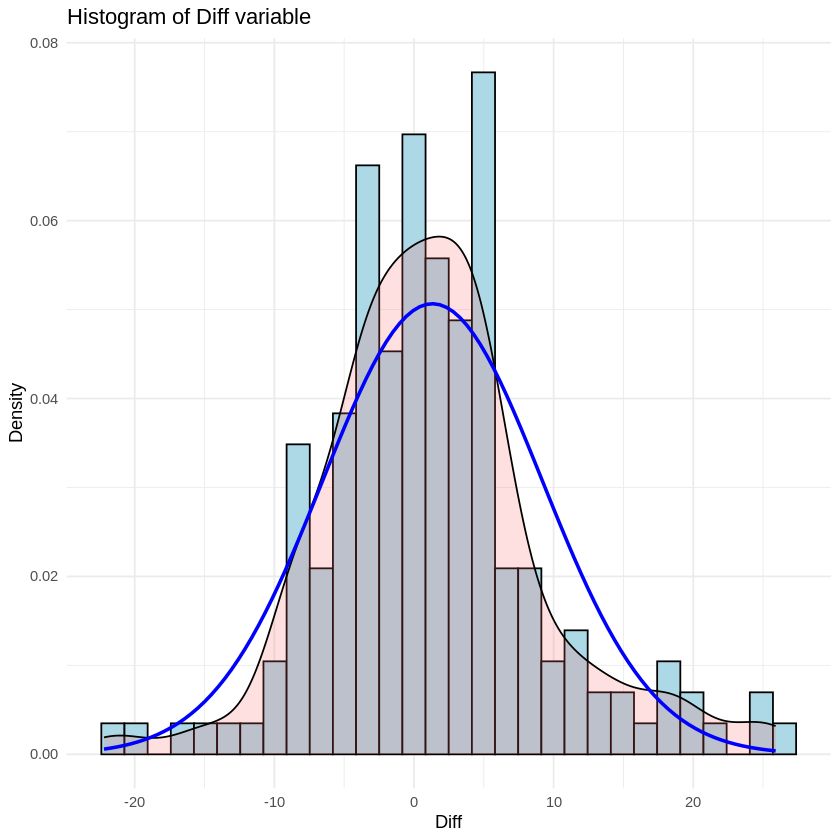

In [ ]:
# Biến phụ thuộc Diff
ggplot(rm_outliner_islander, aes(x = Diff)) +
  geom_histogram(aes(y = ..density..), bins = 30, color = "black", fill = "lightblue") +
  geom_density(alpha = 0.2, fill = "#FF6666") +
  stat_function(fun = dnorm, args = list(mean = mean(rm_outliner_islander$Diff, na.rm = TRUE), sd = sd(rm_outliner_islander$Diff, na.rm = TRUE)),
                color = "blue", size = 1) +
  theme_minimal() +
  labs(title = "Histogram of Diff variable", x = "Diff", y = "Density")
  summary(rm_outliner_islander$Diff)

Nhận xét: Sau khi loại bỏ các điểm ngoại lai và cực ngoại lai, ta thu được đồ thị gần chuẩn và có hình dáng tốt hơn trước khi loại.

#### Kiểm định mô hình

             Df Sum Sq Mean Sq F value   Pr(>F)    
Dosage        2    190    94.8   2.115    0.124    
Drug          2    957   478.4  10.670 4.40e-05 ***
Dosage:Drug   4   2166   541.6  12.079 1.25e-08 ***
Residuals   164   7354    44.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


	Shapiro-Wilk normality test

data:  av_residual
W = 0.98596, p-value = 0.08056


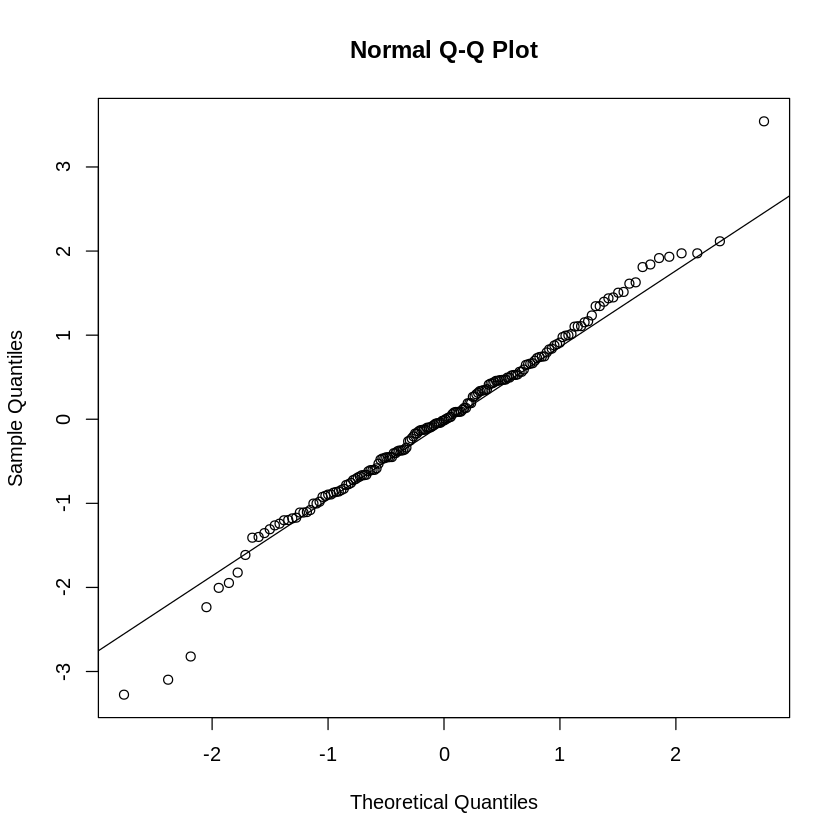

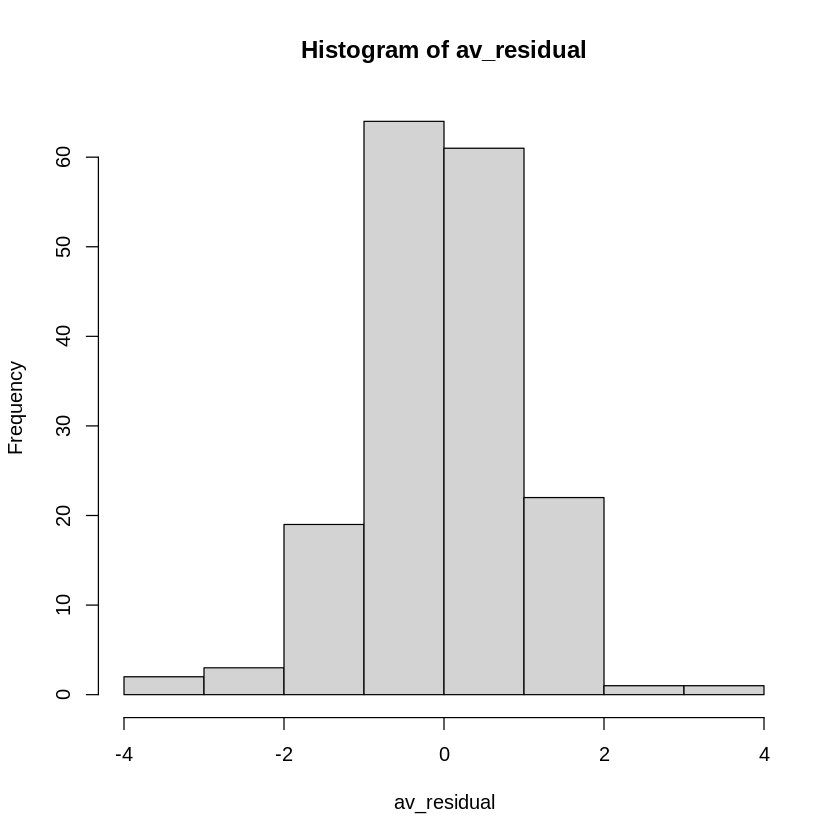

In [ ]:
# Shapiro-Wilk test
int_model = aov(Diff~ Dosage * Drug, rm_outliner_islander)
summary(int_model)

av_residual = rstandard(int_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

- Với mức ý nghĩa 5%, ta thấy bản thân liều lượng (Dosage) sẽ không tác động đến hiệu quả của người sử dụng thuốc, tuy nhiên chúng có mối liên hệ mật thiết (có tương tác) với loại thuốc.
- Với mức ý nghĩa 5%, ta thấy rằng phần dư tuân theo phân phối chuẩn

 lag Autocorrelation D-W Statistic p-value
   1      -0.1264805      2.251922   0.304
 Alternative hypothesis: rho != 0

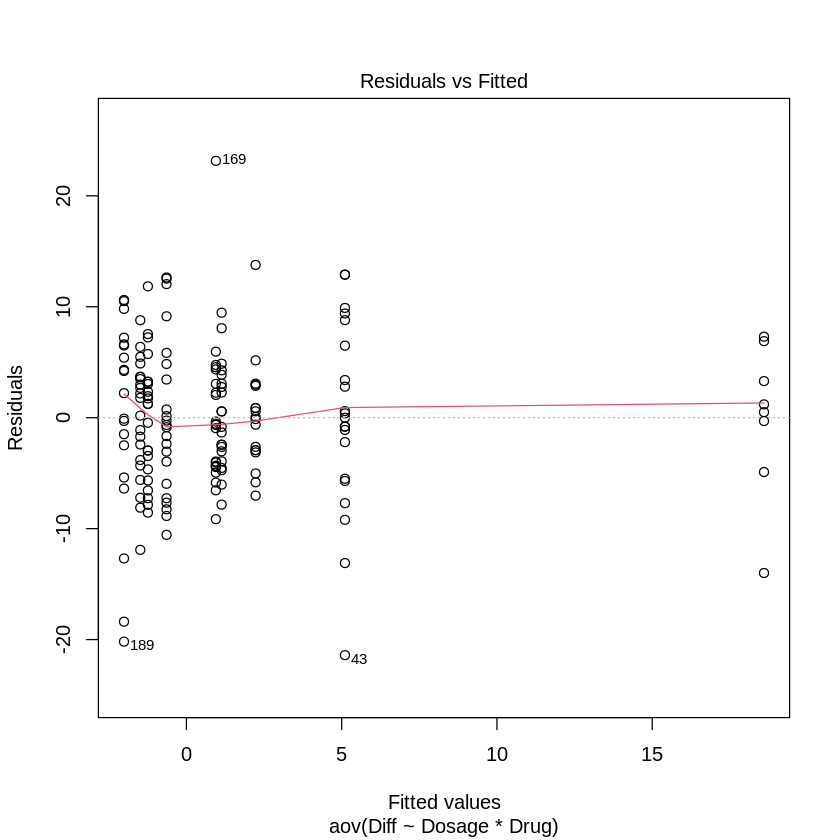

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(int_model)
plot(int_model, 1)

Với mức ý nghĩa 5%, ta thấy rằng mô hình có phần dư độc lập

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(int_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,8,1.440304,0.1833148
,164,NA,NA


Với mức ý nghĩa 5%, ta thấy mô hình có phương sai của các nhóm đồng nhất

#### Kiểm định anova mô hình

Trong phần này, chúng tôi chỉ phân tích các điểm khác nhau giữa trước và sau khi loại outliers, trường hợp kết quả giống nhau, có thể xem lại kết quả trước đó.

             Df Sum Sq Mean Sq F value   Pr(>F)    
Dosage        2    190    94.8   2.115    0.124    
Drug          2    957   478.4  10.670 4.40e-05 ***
Dosage:Drug   4   2166   541.6  12.079 1.25e-08 ***
Residuals   164   7354    44.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

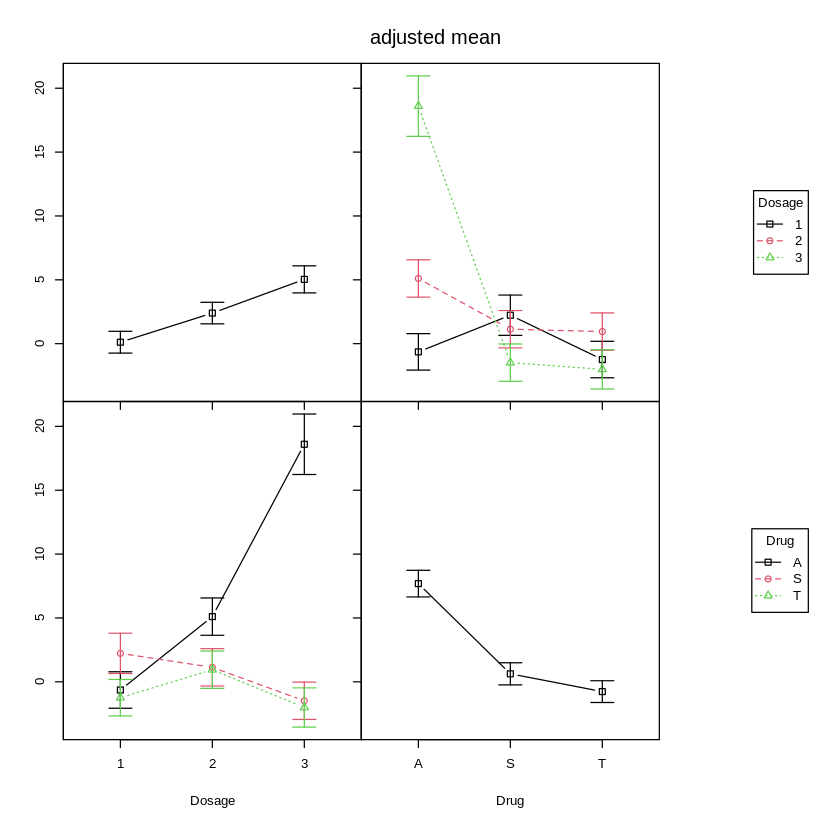

In [ ]:
summary(int_model)
plot(interactionMeans(int_model))

Nhận xét:
- Với mức ý nghĩa 5%, ta thấy giữa `Dosage` và `Drug` có sự tương tác với nhau (p-value=1.25e-08). Sự kết hợp giữa hàm lượng thuốc và loại thuốc có ảnh hưởng rất lớn đến thời gian hoàn thành bài kiểm tra, cho thấy rằng không chỉ từng yếu tố riêng lẻ mà sự kết hợp giữa chúng cũng rất quan trọng.

**BIỂU ĐỒ BÊN TRÁI**
--

Biểu đồ bên trái biểu diễn sự tương tác giữa Dosage và Drug dựa trên giá trị trung bình điều chỉnh của Diff.

1. Đồ thị trên cùng bên trái (Dosage theo Drug):

    - Cho thấy sự thay đổi của Diff theo liều lượng (Dosage) cho từng loại thuốc (Drug).
    - Đối với tất cả các loại thuốc, Diff tăng dần khi tăng liều lượng từ 1 đến 3.
2. Đồ thị dưới cùng bên trái (Drug theo Dosage):

- Cho thấy sự thay đổi của Diff theo loại thuốc (Drug) cho từng liều lượng (Dosage).
- Khi liều lượng là 1: sự khác biệt giữa các loại thuốc là tương đối nhỏ. Trong đó loại S cho hiệu quả cao nhất, A và T cho kết quả tệ hơn trước khi sử dụng (mean < 0).
- Khi liều là 2: Có sự thay đổi rõ rệt ở các loại thuốc: Loại S cho kết quả tệ hơn so với trước khi dùng thuốc, loại T có hiệu quả không đáng kể, loại A cho thấy hiệu quả vượt bật.
- Khi liều lượng là 3: Sự khác biệt giữa các loại thuốc trở nên rõ rệt hơn, với Thuốc A cho kết quả tốt nhất so với 3 loại và ở cả 3 liều lượng, trong khi 2 loại còn lại cho kết quả tệ hơn trước khi dùng.

**BIỂU ĐỒ BÊN PHẢI**
--

Biểu đồ bên phải biểu diễn sự tương tác giữa Drug và Dosage dựa trên giá trị trung bình điều chỉnh của Diff.

1. Đồ thị trên cùng bên phải (Drug theo Dosage):

    - Tương tự như đồ thị dưới cùng bên trái của biểu đồ bên trái, nhưng theo chiều ngược lại. Cho thấy sự thay đổi của Diff theo loại thuốc cho từng liều lượng.
    - Đối với thuốc A: Cho kết quả tốt liều lượng cao và trung bình, liều lượng thấp không có sự thay đổi
    - Đối với thuốc T: Không có sự khác biệt giữa các liều lượng và hiệu quả sau và trước khi sửng dụng (Thậm chí giảm (tệ))
    - Đối với thuốc S: Giống T
2. Đồ thị dưới cùng bên phải (Dosage theo Drug):

    - Tương tự như đồ thị trên cùng bên trái của biểu đồ bên trái, nhưng theo chiều ngược lại.
    - Cho thấy sự thay đổi của Diff theo liều lượng cho từng loại thuốc.
    - Cơ bản các thuốc cho kết quả tốt nhất theo thứ tự là là A > S > T.

**NHẬN XÉT**
--
- Cả liều lượng và loại thuốc đều có ảnh hưởng đáng kể đến Diff.
- Có sự tương tác đáng kể giữa liều lượng và loại thuốc, nghĩa là hiệu quả của liều lượng khác nhau phụ thuộc vào loại thuốc được sử dụng.
- Biểu đồ cho thấy rõ ràng rằng Thuốc A (Alprazolam) có ảnh hưởng lớn nhất khi liều lượng tăng, trong khi S có ảnh hưởng ít nhất.

#### Phân tích ảnh hưởng đơn

Phân tích ảnh hưởng đơn của liều lượng ở mỗi loại thuốc

In [ ]:
testInteractions(int_model, fixed = "Drug", across = "Dosage")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 8, is not a multiple of vector length 6 of arg 2”


,Dosage1,Dosage2,SE1,SE2,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,-19.2409091,-13.495238,2.764648,2.782146,2,2176.58239,24.270232,1.754299e-09
S,3.7134921,2.619048,2.150909,2.066526,2,144.84001,1.615055,4.040531e-01
T,0.7696172,2.958145,2.097198,2.120211,2,95.99848,1.070442,4.040531e-01
Residuals,NA,NA,164.000000,7353.854655,NA,NA,NA,NA


Giả định:
- H0: Liều lượng Không ảnh hưởng đến hiệu quả thuốc
- H1: Liều lượng Có ảnh hưởng đến hiệu quả của thuốc

Nhận xét: Với kết quả phân tích ta có một số nhận xét như sau, với độ tin cậy 5% thì:
- Liều lượng có ảnh hưởng đến kết quả của loại thuốc A
- Liều lượng không ảnh hưởng đến kết quả của lọai thuốc S và T

 Phân tích ảnh hưởng đơn của thuốc ở mỗi liều lượng

In [ ]:
testInteractions(int_model, fixed = "Dosage", across = "Drug")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 8, is not a multiple of vector length 6 of arg 2”


,Drug1,Drug2,SE1,SE2,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.600000,3.4686869,2.019014,2.128227,2,132.2203,1.474337,2.319485e-01
2,4.157143,0.1857143,2.066526,2.066526,2,231.6200,2.582705,1.572813e-01
3,20.610526,0.5248120,2.822251,2.120211,2,2759.4956,30.770072,1.348841e-11
Residuals,NA,NA,164.000000,7353.854655,NA,NA,NA,NA


Giả định:
- H0: Các loại thuốc sẽ không tác động ở mỗi liều lượng
- H1: Các loại thuốc sẽ có tác động ở mỗi liều lượng

Nhận xét: Với kết quả phân tích ta có một số nhận xét như sau, với độ tin cậy 5% thì:
- Hầu hết các loại thuốc sẽ có tác động ở liều lượng cao
- Liều lượng thấp và trung bình cho kết quả không đáng kể.

##### Phân tích ảnh hưởng đơn giữa các nhóm thuốc ứng với mỗi liều lượng

In [ ]:
options(contrasts = c(unordered="contr.sum", ordered="contr.poly"))
A_vs_S = list(Drug = c(1, -1, 0))
A_vs_T = list(Drug = c(1, 0, -1))
S_vs_T = list(Drug = c(0, 1, -1))

In [ ]:
# Nhóm A và S
testInteractions(int_model, custom = c(A_vs_S), fixed = "Dosage", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Drug1,-2.868687,2.128227,1.000,81.47071,1.816897,5.386261e-01
2 : Drug1,3.971429,2.066526,1.000,165.60857,3.693275,1.690984e-01
3 : Drug1,20.085714,2.782146,1.000,2337.14601,52.121229,5.545574e-11
Residuals,NA,164.000000,7353.855,NA,NA,NA


Giả định:
- H0: Không có sự tác động giữa nhóm thuốc A và S ở các liều lượng
- H1: Có sự tác động giữa nhóm thuốc A và S ở các liều lượng

Nhận xét: Với độ tin cậy 5%
- Có sự tác động về hiệu quả khi sử dụng thuốc thuốc A và S ở các  liều lượng cao.
- Ở liều lượng thấp và trung bình: Không có sự tác động

In [ ]:
# Nhóm A và T
testInteractions(int_model, custom = c(A_vs_T), fixed = "Dosage", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Drug1,0.600000,2.019014,1.000,3.9600,0.08831287,1.000000e+00
2 : Drug1,4.157143,2.066526,1.000,181.4593,4.04676517,1.376805e-01
3 : Drug1,20.610526,2.822251,1.000,2391.4317,53.33186783,3.478680e-11
Residuals,NA,164.000000,7353.855,NA,NA,NA


Giả định:
- H0: Không có tương tác nhau giữa nhóm thuốc A và T ở các liều lượng
- H1: Có tương tác nhau giữa nhóm thuốc A và T ở các liều lượng

Nhận xét: Với độ tin cậy 5%
- Ở liều cao: Có tương tác biệt về hiệu quả khi sử dụng thuốc ở các  loại thuốc A và T
- Ở liều thấp và trung bình: Không có sựu ảnh hưởng rõ rệt

In [ ]:
# Nhóm S và T
testInteractions(int_model, custom = c(S_vs_T), fixed = "Dosage", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1 : Drug1,3.4686869,2.128227,1.000,119.1147071,2.656404413,0.3151584
2 : Drug1,0.1857143,2.066526,1.000,0.3621429,0.008076231,1.0000000
3 : Drug1,0.5248120,2.120211,1.000,2.7473910,0.061270197,1.0000000
Residuals,NA,164.000000,7353.855,NA,NA,NA


Giả định:
- H0: Không có sự khác nhau giữa loại thuốc S và T
- H1: Có sự khác nhau giữa loại thuốc S và T

Nhận xét: Với độ tin cậy 5% thì không có sự khác biệt nào ở cả 3 liều lượng.

**Nhận xét chung**
 Khi dùng thuốc liều cao, giữa các nhóm sẽ cho ra các phản ứng ảnh hưởng đến trí nhớ ở nhóm A-T và A-S. Tuy nhiên, nhóm S-T lại không cho thấy sự tương tác nào có ý nghĩa thống kê.

##### Phân tích ảnh hưởng đơn giữa các nhóm liều lượng ứng với mỗi loại thuốc

In [ ]:
options(contrasts = c(unordered="contr.sum", ordered="contr.poly"))
low_vs_medium = list(Dosage = c(1, -1, 0))
low_vs_high = list(Dosage = c(1, 0, -1))
medium_vs_high = list(Dosage = c(0, 1, -1))

In [ ]:
# Nhóm thấp và trung bình
testInteractions(int_model, custom = c(low_vs_medium), fixed = "Drug", adjustment = "bonferroni")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A : Dosage1,-5.745671,2.042908,1.000,354.69497,7.9101339,0.01654912
S : Dosage1,1.094444,2.150909,1.000,11.60953,0.2589068,1.00000000
T : Dosage1,-2.188528,2.042908,1.000,51.46095,1.1476424,0.85685163
Residuals,NA,164.000000,7353.855,NA,NA,NA


Giả định:
- H0: Không có sự tương tác nhau giữa liều thấp và liều trung bình
- H1: Có sự tương tác nhau giữa liều thấp và liều trung bình

Nhận xét: Với độ tin cậy 5%
- Ở loại thuốc A: Có sự tương tác về hiệu quả khi sử dụng thuốc ở các  liều lượng thấp và liều lượng trung bình
- Ở loại thuốc S và T: Không có sự tương tác

In [ ]:
# Nhóm thấp và cao
testInteractions(int_model, custom = c(low_vs_high), fixed = "Drug", adjustment = "none")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A : Dosage1,-19.2409091,2.764648,1.000,2171.91382,48.436348,7.777949e-11
S : Dosage1,3.7134921,2.150909,1.000,133.65715,2.980719,8.614496e-02
T : Dosage1,0.7696172,2.097198,1.000,6.03868,0.134670,7.141114e-01
Residuals,NA,164.000000,7353.855,NA,NA,NA


Giả định:
- H0: Không có tương tác nhau giữa liều thấp và liều cao
- H1: Có tương tác nhau giữa liều thấp và liều cao

Nhận xét: Với độ tin cậy 5%
- Ở loại thuốc A: Có sự tương tác khi sử dụng thuốc ở các liều lượng thấp và liều lượng cao
- Ở loại thuốc S và T: Không có sự tương tác mang ý nghĩ thống kê

In [ ]:
# Nhóm trung bình và cao
testInteractions(int_model, custom = c(medium_vs_high), fixed = "Drug", adjustment = "none")

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A : Dosage1,-13.495238,2.782146,1.000,1055.04841,23.528877,2.841508e-06
S : Dosage1,2.619048,2.066526,1.000,72.02381,1.606220,2.068207e-01
T : Dosage1,2.958145,2.120211,1.000,87.28747,1.946618,1.648383e-01
Residuals,NA,164.000000,7353.855,NA,NA,NA


Giả định:
- H0: Không có sự tương tác giữa liều trung bình và liều cao
- H1: Có sự tương tác giữa liều trung bình và liều cao

Nhận xét: Với độ tin cậy 5%
- Ở loại thuốc A: Có sự tương tác khi sử dụng thuốc ở các  liều lượng trung bình và liều lượng cao
- Ở loại thuốc S và T: Không có sự tương tác mang ý nghĩa thống kê

**Nhận xét chung**
- Hầu hết các liều lượng thấp và trung bình sẽ cho thấy mức độ ít tương tác mang ý nghĩ thống kê ở các loại thuốc
- Hầu hết các loại thuốc T và S cho kết quả là không có sự tương tác giữa liều lượng với loại A

#### Phân tích ảnh hưởng chính

##### Phân tích ảnh hưởng chính của Dosage với hiệu quả của bài kiểm tra trí nhớ
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
dosage_model = aov(Diff~Dosage, data = rm_outliner_islander)
summary(dosage_model)

             Df Sum Sq Mean Sq F value Pr(>F)
Dosage        2    190   94.84   1.539  0.218
Residuals   170  10477   61.63               

Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Dosage không có ý nghĩa trong việc giải thích mô hình. Theo nguyên tắc thì ta không cần phải đi kiểm định các giả thuyết cho biến này. Tuy nhiên chúng ta vẫn kiểm định để xem kết quả cải thiện như thế nào so với trước đó.


	Shapiro-Wilk normality test

data:  av_residual
W = 0.96742, p-value = 0.0004441


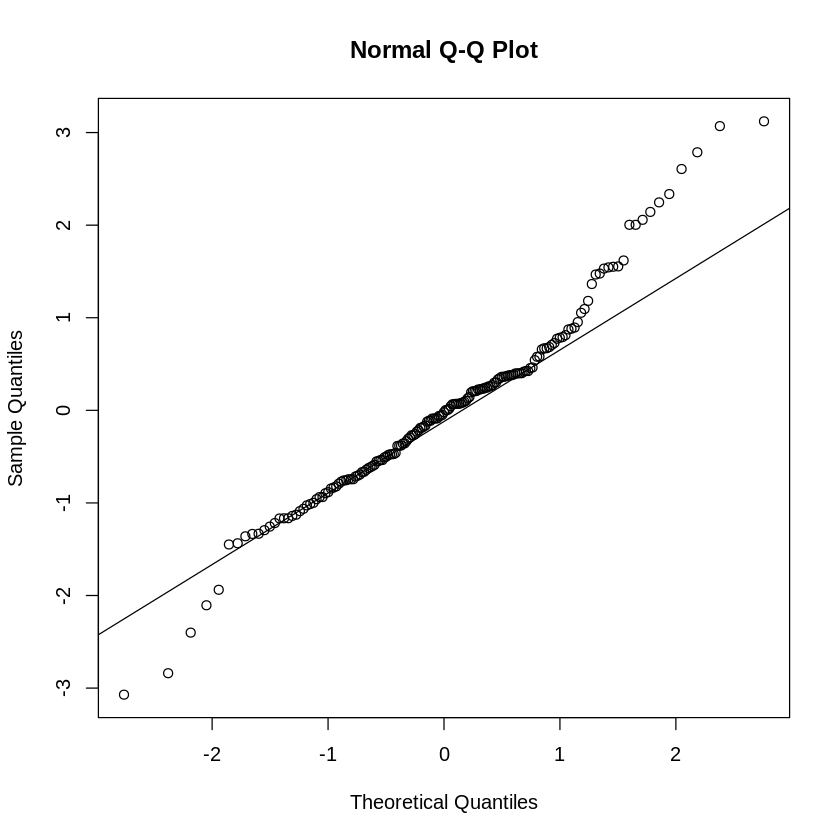

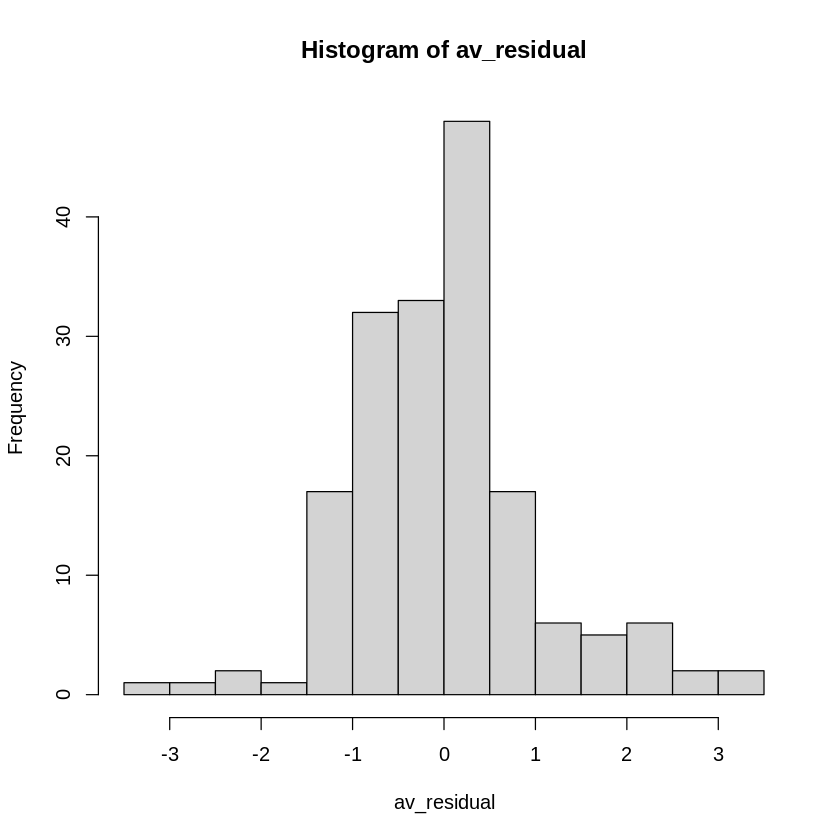

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(dosage_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Nhẫn xét: Giá trị p-value đã tăng lên rất nhiều (mặc dù < 0.05), hình dáng đồ thị gần chuẩn hơn so với trước khi chưa xử lý dữ liệu

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(dosage_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,4.442547,0.01316301
,170,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 0.013 > 0.05, ta không điều kiện bác bỏ H0, vậy các nhóm có phương sai đồng nhất (trước đó là không đồng nhất).

 lag Autocorrelation D-W Statistic p-value
   1       0.1925394      1.614224   0.004
 Alternative hypothesis: rho != 0

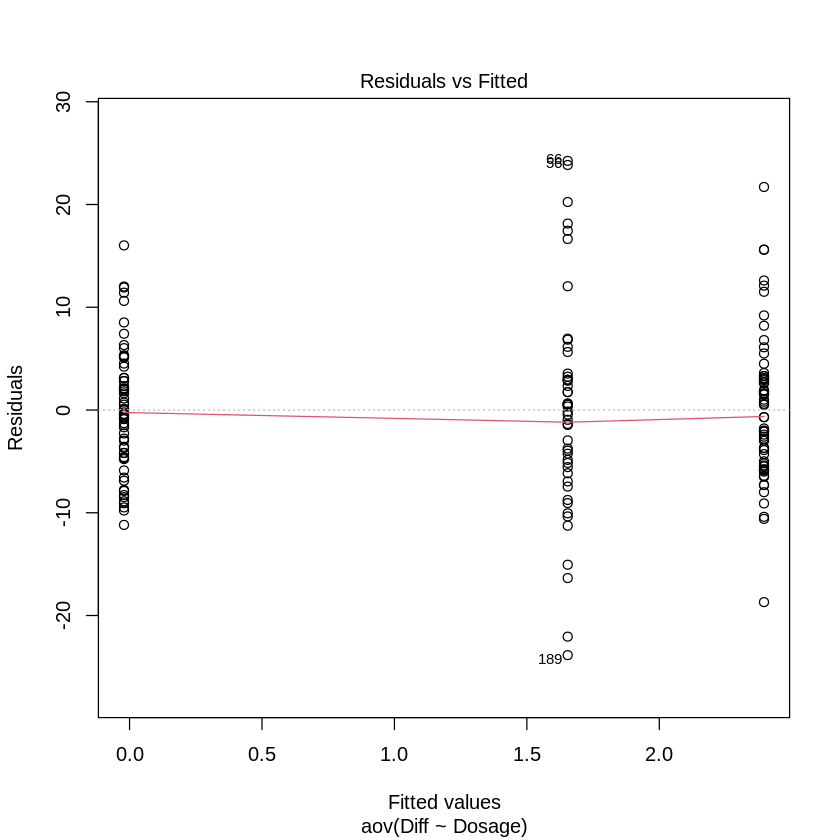

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(dosage_model)
plot(dosage_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.02 nên có sự tương quan dương, tuy nhiên kết quả này lớn hơn kết quả trước đó (=0).


	Pairwise comparisons using t tests with pooled SD 

data:  Diff and Dosage 

  1    2   
2 0.26 -   
3 0.81 1.00

P value adjustment method: bonferroni 

  Tukey multiple comparisons of means
    95% family-wise confidence level

Fit: aov(formula = Diff ~ Dosage, data = rm_outliner_islander)

$Dosage
          diff        lwr      upr     p adj
2-1  2.4162058 -0.9043599 5.736772 0.2005076
3-1  1.6751344 -1.8935084 5.243777 0.5093089
3-2 -0.7410714 -4.2973338 2.815191 0.8748804


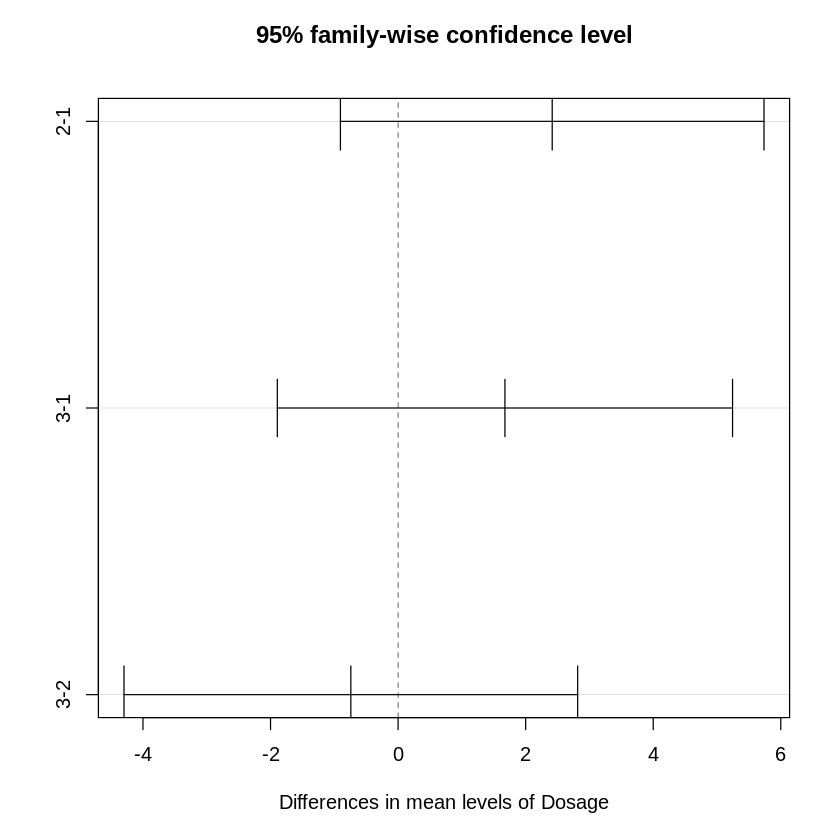

In [ ]:
# Kiểm định trung bình giữa các nhóm liều lượng
with(rm_outliner_islander, pairwise.t.test(Diff, Dosage, p.adj = "bonferroni"))
TukeyHSD(aov(Diff~Dosage, data=rm_outliner_islander), conf.level = 0.95)
plot(TukeyHSD(aov(Diff~Dosage, data=rm_outliner_islander), conf.level = 0.95))

Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có: Các cặp có p-value đều có giá trị lớn hơn 0.05 (độ tin cậy 95%) nên ta cơ sở để bác bỏ H0. Vậy rõ ràng giữa các nhóm này có giá trị trung bình là như nhau.Để rõ hơn, ta tiến hành kiểm định Tukey's.
- Nhìn vào kết quả và hình vẽ ta cũng thấy ngay mức độ hiệu quả trung bình như nhau ở 3 nhóm(đồ thị cắt điểm 0)
- Kết quả trước đó cho ta thấy rằng  3-2 và 1-2 có mức độ hiệu quả trung bình như nhau  và 3-1 là khác nhau.

Phân tích tương tác của từng nhóm liều lượng với nhau

In [ ]:
A_vs_S = list(Dosage = c(1, -1, 0))
A_vs_T = list(Dosage = c(1, 0, -1))
S_vs_T = list(Dosage = c(0, 1, -1))
testInteractions(dosage_model, custom = A_vs_S, adjustment = 'bonferroni')
print("----------------------------------------------------------")
testInteractions(dosage_model, custom = A_vs_T, adjustment = 'bonferroni')
print("----------------------------------------------------------")
testInteractions(dosage_model, custom = S_vs_T, adjustment = 'bonferroni')

Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dosage1,-2.416206,1.404387,1.00,182.4274,2.960017,0.08716664
Residuals,NA,170.000000,10477.19,NA,NA,NA


[1] "----------------------------------------------------------"


Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dosage1,-1.675134,1.509308,1.00,75.91709,1.23181,0.2686228
Residuals,NA,170.000000,10477.19,NA,NA,NA


[1] "----------------------------------------------------------"


Warning message in rbind(deparse.level, ...):
“number of columns of result, 6, is not a multiple of vector length 5 of arg 2”


,Value,SE,Df,Sum of Sq,F,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Dosage1,0.7410714,1.504072,1.00,14.96163,0.2427633,0.6228532
Residuals,NA,170.000000,10477.19,NA,NA,NA


Giả định:
- H0: Không có sự tương tác giữa 2 nhóm thuốc được nhắc đến
- H1: Có sự tương tác giữa 2 nhóm thuốc được nhắc đến

Với p-value=0.05, ta có kết luận như sau: cả 3 nhóm đều có sự tương tác mang ý nghĩa thống kê (giống kết quả trước đó).

##### Phân tích ảnh hưởng chính của Drug với hiệu quả của bài kiểm tra trí nhớ
Gồm các bước sau:
- Xây dựng mô hình
- Kiểm định các giả thiết của mô hình
- Kiểm định trung bình của các nhóm
- Nhận xét

In [ ]:
drug_model = aov(Diff~Drug, data = rm_outliner_islander)
summary(drug_model)

             Df Sum Sq Mean Sq F value   Pr(>F)    
Drug          2    896   447.8   7.791 0.000579 ***
Residuals   170   9771    57.5                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Nhận xét: Với mức ý nghĩa 0.05, ta thấy rằng Drug có ý nghĩa trong việc giải thích mô hình


	Shapiro-Wilk normality test

data:  av_residual
W = 0.9859, p-value = 0.07921


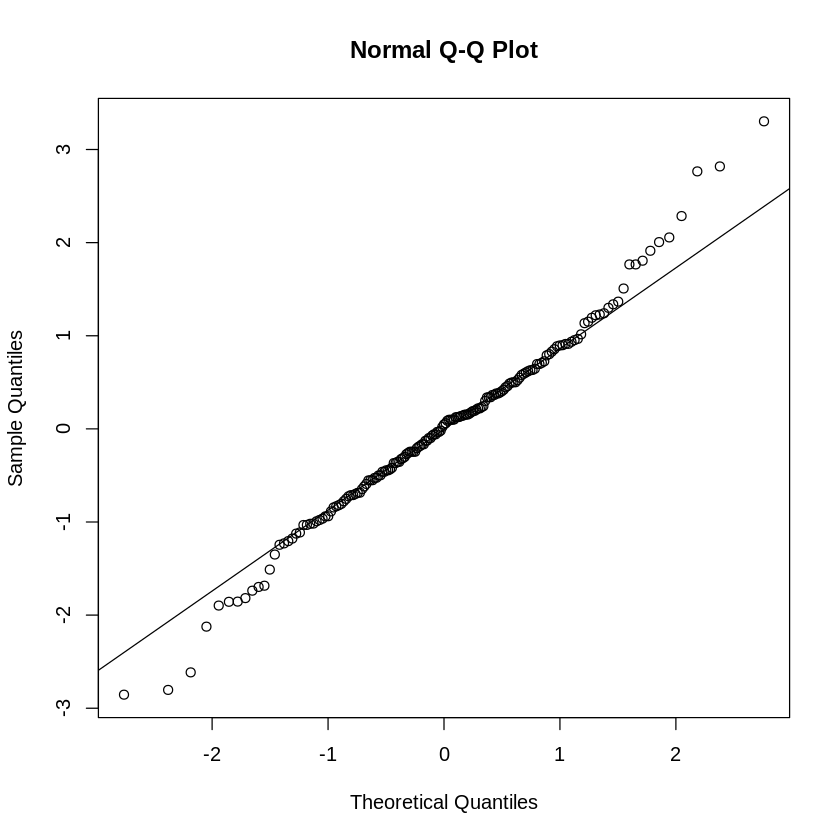

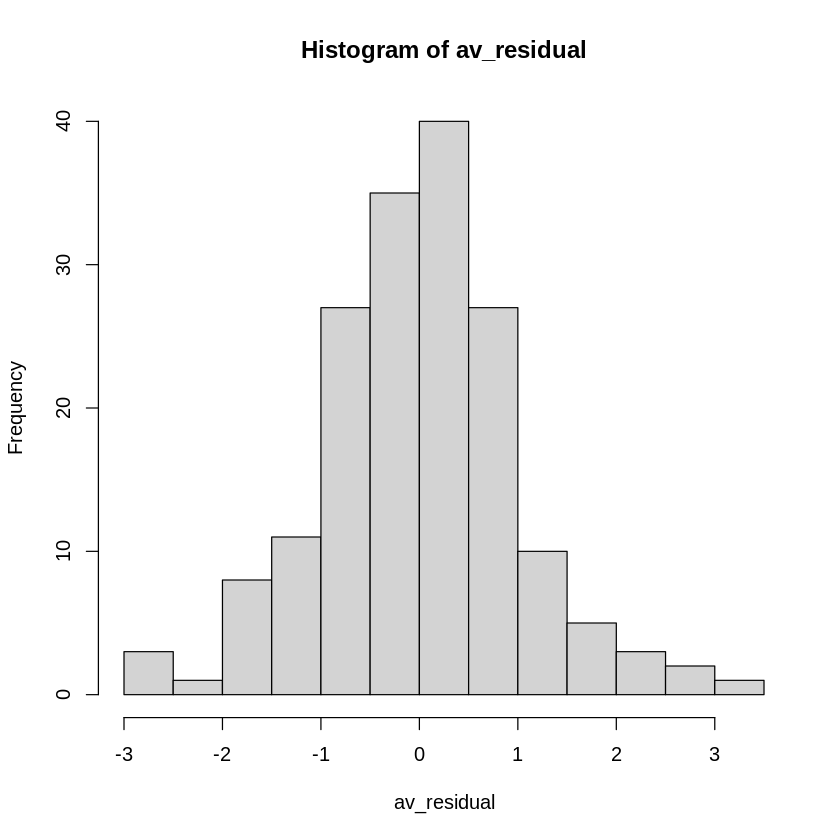

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(drug_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value =0.07921 chúng ta không đủ cơ sở bác bỏ H0, vậy sai số có phân phối chuẩn. Nhìn vào biểu đồ, ta thấy rằng ở phần đuôi kéo dài, có một vài điểm bị kéo lệch ra khỏi đường thẳng về mặt tổng quan, dữ liệu vẫn có dạng gần chuẩn (trước đó là không chuẩn)

In [ ]:
# Kiểm định các nhóm có phương sai đồng nhất hay không
leveneTest(drug_model)

,Df,F value,Pr(>F)
,<int>,<dbl>,<dbl>
group,2,11.12926,2.87001e-05
,170,NA,NA


Giả định:
- H0: Các nhóm có phương sai đồng nhất
- H1: Các nhóm không có phương sai đồng nhất

Nhận xét: Với giá trị p-value = 2.87001e-05 < 0.05, ta  đủ điều kiện bác bỏ H0, vậy các nhóm có phương sai không đồng nhất, tuy nhiên kết quả có giá trị p-value cao hơn trước (2.735522e-08).

 lag Autocorrelation D-W Statistic p-value
   1       0.1377577      1.719318   0.062
 Alternative hypothesis: rho != 0

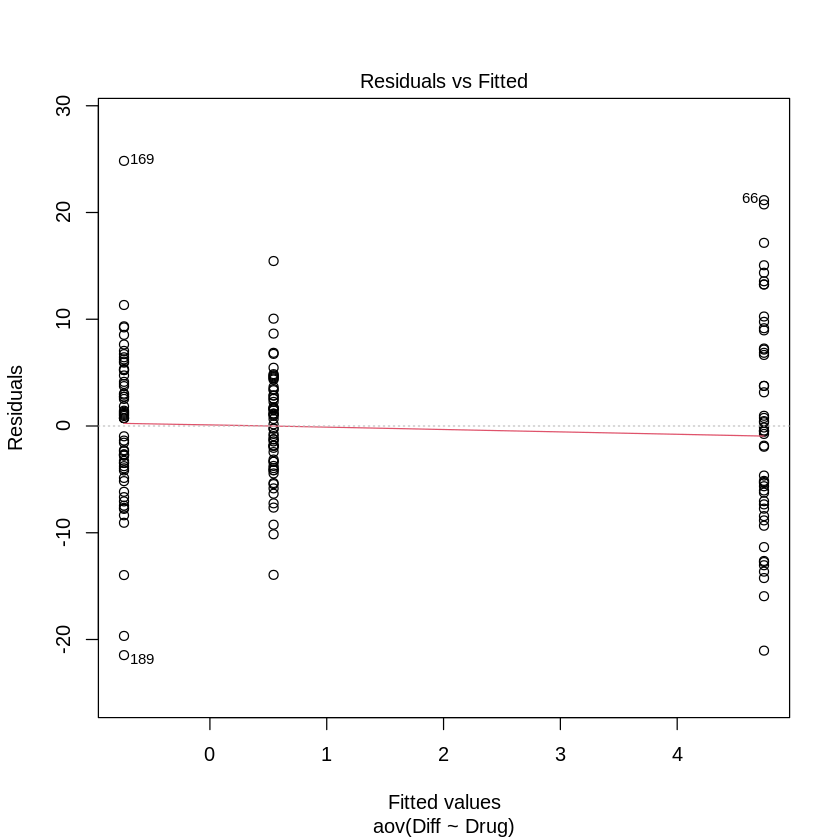

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(drug_model)
plot(drug_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.062 nên không có sự tương quan (trước đó là tương quan dương).

In [ ]:
# Kiểm định độ hiệu quả trung bình giữa các nhóm thuốc
with(rm_outliner_islander, pairwise.t.test(Diff, Drug, p.adj = "bonferroni"))
TukeyHSD(aov(Diff~Drug, data=rm_outliner_islander), conf.level = 0.95)
plot(TukeyHSD(aov(Diff~Drug, data=rm_outliner_islander), conf.level = 0.95))

ERROR: Error in eval(expr, envir, enclos): object 'rm_outliner_islander' not found


Giả định:
- Giả thuyết:
    + H0: Các giá trị trung bình giữa các cặp bằng nhau
    + H1: Các giá trị trung bình giữa các cặp không bằng nhau
- Nhìn vào kết quả ta có:
    + Nhóm T-S có p-value > 0.05 nên không đủ bác bỏ H0, vậy nhóm này có giá trị trung bình bằng nhau.
    + Các nhóm còn lại p-value đều có giá trị nhỏ hơn 0.05 (độ tin cậy 95%) nên ta có cơ sở để bác bỏ H0. Vậy rõ ràng giữa các nhóm này có giá trị trung bình là khác nhau. Nghĩa là các nhóm thuốc khác nhau thì cho thấy mức độ ảnh hưởng đến bệnh nhân khác nhau. Để rõ hơn, ta tiến hành kiểm định Tukey's
- Nhìn vào kết quả và hình vẽ ta cũng thấy ngay giữa nhóm S-A và T-A có mức độ hiệu quả trung bình khác nhau, T-S có mức độ hiệu quả trung bình như nhau (đồ thị cắt điểm 0) (giống kết quả phân tích trước đó).

### Xây dựng và kiểm định mô hình cộng (Additive model)
Gồm các bước sau:
- Xây dựng mô hình với các biến
- Kiểm định mô hình

In [ ]:
add_model = lm(Diff~., data=rm_outliner_islander)
add_model <- MASS::stepAIC(add_model, k = log(nrow(rm_outliner_islander)), trace = 0)
summary(add_model)
add_model$coefficients


Call:
lm(formula = Diff ~ Drug, data = rm_outliner_islander)

Residuals:
     Min       1Q   Median       3Q      Max 
-21.4645  -4.4450   0.3569   4.3550  24.8355 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.5176     0.5785   2.623 0.009502 ** 
Drug1         3.2256     0.8428   3.827 0.000182 ***
Drug2        -0.9726     0.8087  -1.203 0.230799    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.581 on 170 degrees of freedom
Multiple R-squared:  0.08396,	Adjusted R-squared:  0.07318 
F-statistic: 7.791 on 2 and 170 DF,  p-value: 0.000579


(Intercept)       Drug1       Drug2 
  1.5175511   3.2255861  -0.9725511

Nhận xét: Với p-value=5%, chỉ có biến Drug có ý nghĩ trong việc giải thích mô hình. Ta tiến hành kiểm định  Shapiro và Breusch-Pagan


	Shapiro-Wilk normality test

data:  av_residual
W = 0.9859, p-value = 0.07921


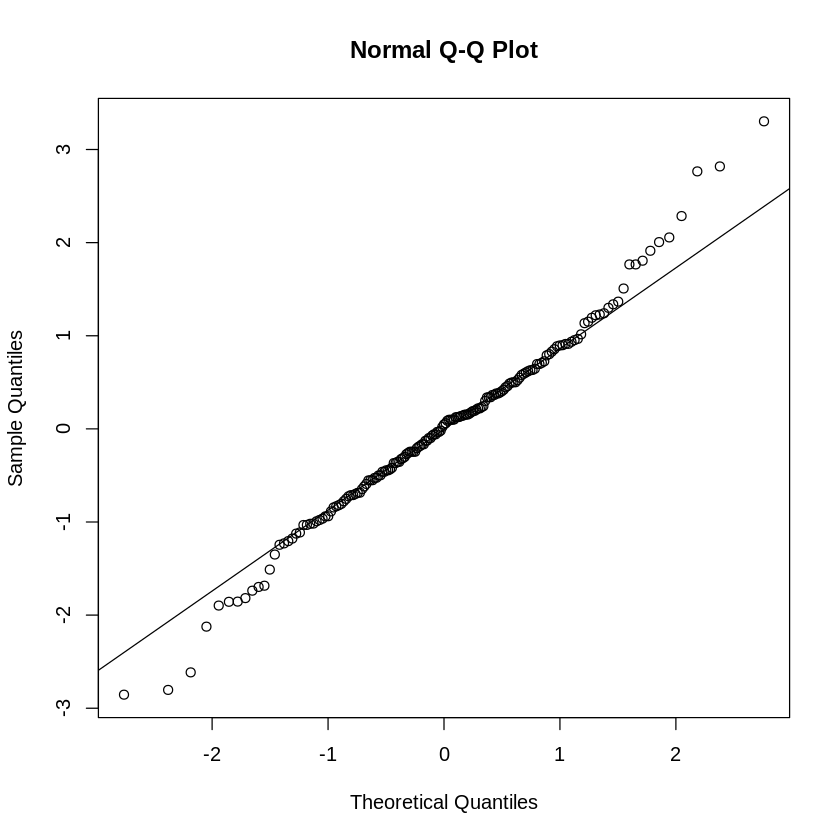

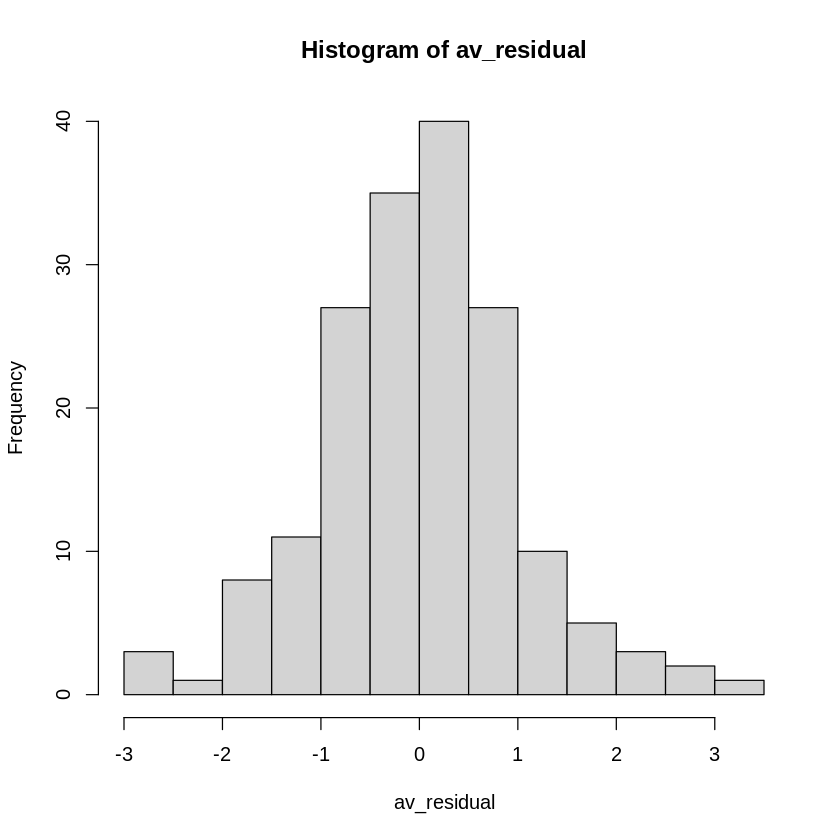

In [ ]:
# Shapiro-Wilk test
av_residual = rstandard(add_model)
shapiro.test(av_residual)

# Trực quan bằng QQ plot
qqnorm(av_residual)
qqline(av_residual)
hist(av_residual)

Giả định:
- H0: Tuân theo phân phối chuẩn
- H1: Không tuân theo phân phối chuẩn

Nhận xét: với độ tin cậy 5% thì với giá trị p-value = 0.07921 chúng ta không đủ cơ sở bác H0, vậy phần dư tuân theo chuẩn.

 lag Autocorrelation D-W Statistic p-value
   1       0.1377577      1.719318   0.034
 Alternative hypothesis: rho != 0

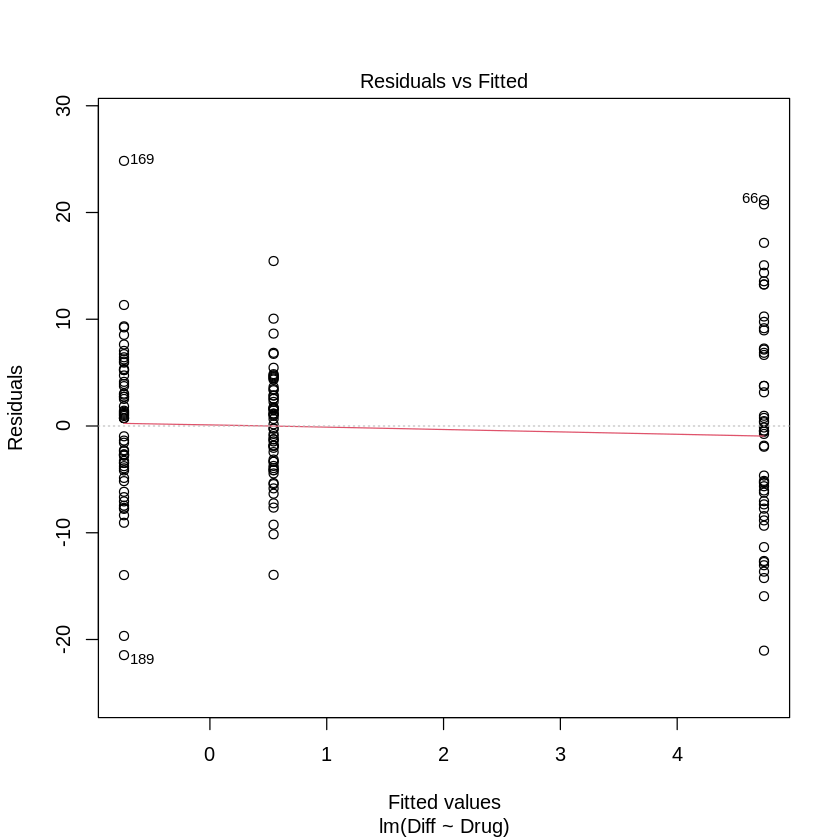

In [ ]:
# Kiểm định tính độc lập của phần dư
durbinWatsonTest(add_model)
plot(add_model, 1)

Giả định:
- H0: Không có sự tương quan (độc lập)
- H1: Có sự tương quan (không độc lập)

Nhận xét: Với giá trị p-value = 0.034 nên có sự tương quan dương, tuy nhiên kết quả tốt hơn trước (=0).

In [ ]:
# Kiểm định  Breusch-Pagan
bptest(add_model)
add_model$coefficients


	studentized Breusch-Pagan test

data:  add_model
BP = 16.22, df = 2, p-value = 0.0003006


(Intercept)       Drug1       Drug2 
  1.5175511   3.2255861  -0.9725511

Giả định:
 - H0: phương sai không đổi
 - H1: phương sai thay đổi

 Với p-value=0.0003006 < 0.05 thì ta đủ điều kiện bác bỏ H0. Vậy phương sai của mô hình thay đổi.

Như vậy, mô hình cộng được xây dựng như sau:
Diff=1.51755112797807 + 3.22558612692389×Drug1 - 0.972551127978073×Drug2

- Drug1: Hệ số cho Drug1 là 3.2256. Điều này cho thấy rằng khi sử dụng loại thuốc thứ nhất, sự khác biệt trong thời gian hoàn thành bài kiểm tra tăng thêm
3.2256 iây so với không sử dụng thuốc. Hệ số này có ý nghĩa thống kê (p-value = 0.000182 < 0.001)
- Drug2:Hệ số cho Drug2 là −0.9726. Điều này cho thấy rằng khi sử dụng loại thuốc thứ hai, sự khác biệt trong thời gian hoàn thành bài kiểm tra giảm đi
0.9726 giây so với không sử dụng thuốc. Tuy nhiên, hệ số này không có ý nghĩa thống kê (p-value = 0.230799 > 0.05).
- Mô hình tổng thể có ý nghĩa: F-statistic cho thấy mô hình tổng thể có ý nghĩa thống kê, tuy nhiên, Multiple R-squared thấp cho thấy mô hình chỉ giải thích được một phần nhỏ sự biến thiên của Diff

Kết luận: Nếu xem bản thân loại thuốc và liều thuốc tương tác một cách độc lập, thì sau đây là khuyến nghị cho bác sỹ:
Nên sử dụng loại thuốc 2 (thuốc S) cho bệnh nhân.
Thực tế thì việc sử dụng thuốc cần đánh giá ở nhiều khía cạnh (ví dụ như phân tích ảnh hưỏng đơn cho thấy tương tác mạnh với liều lượng) Vì vậy, cần phải cẩn thận cân nhắc khi sử dụng thuốc tránh đem lại hậu quả không mong muốn ngoài tầm kiểm soát.

**Như vậy về tổng thể sao khi loại bỏ các điểm ngoại lai và cực ngoại lai, về vieeck thống kê và phân tích ANOVA đã cho ra một mô hình có các yếu tố thỏa mãn các yếu tố kiểm định về chuẩn hơn, trong TH không chuẩn nhưng chỉ số so với trước là tốt hơn**
